<a href="https://colab.research.google.com/github/vishnuvarthanv/DataScience/blob/master/EDA4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Common to the notebook**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, binom
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
#pip install opendatasets --upgrade

In [19]:
pip install category_encoders

##**Definitions of each features and quick thoughts:**

>PassengerId. Unique identification of the passenger. It shouldn't be necessary for the machine learning model.

>Survived. Survival (0 = No, 1 = Yes). Binary variable that will be our target variable.

>Pclass. Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd). Ready to go.

>Name. Name of the passenger. We need to parse before using it.

>Sex. Gender Categorical variable that should be encoded. We can use dummy -variable to encode it.

>Age. Age in years.

>SibSp. Siblings / Spouses aboard the Titanic.

>Parch. Parents / Children aboard the Titanic.

>Ticket. Ticket number. Big mess.

>Fare. Passenger fare.

>Cabin. Cabin number.

>Embarked. Port of Embarkation , C = Cherbourg, Q = Queenstown, S = Southampton. Categorical feature that should be encoded. We can use feature mapping or make dummy vairables for it.

The main conclusion is that we already have a set of features that we can easily use in our machine learning model. But features like Name, Ticket, Cabin require an additional effort before we can integrate them.

#**1. Load/Read the Data**

In [3]:
#"D:\DS\Tutorials\files\LTFS---Loan-Default-Challenge-master\Loan_train.csv"
from google.colab import files
uploaded = files.upload()

Saving titanic.csv to titanic (1).csv


In [4]:
from pandas.core import missing
import pandas as pd
import numpy as np
#importing the dataset into kaggle
missing_value_formats = ["n.a.","?","NA","n/a", "na", "--"]
dfraw = pd.read_csv('titanic.csv', na_values=missing_value_formats)

In [5]:
missing_values=["n.a.","?","NA","n/a", "na", "--"]
dfraw=dfraw.replace(missing_values,np.nan)
dfraw

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
dfraw.shape

(891, 12)

In [7]:
dfraw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
dfraw.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df=dfraw.copy()

In [10]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
666,667,0,2,"Butler, Mr. Reginald Fenton",male,25.0,0,0,234686,13.0000,NaN,S
507,508,1,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,NaN,0,0,111427,26.5500,NaN,S
497,498,0,3,"Shellard, Mr. Frederick William",male,NaN,0,0,C.A. 6212,15.1000,NaN,S
833,834,0,3,"Augustsson, Mr. Albert",male,23.0,0,0,347468,7.8542,NaN,S


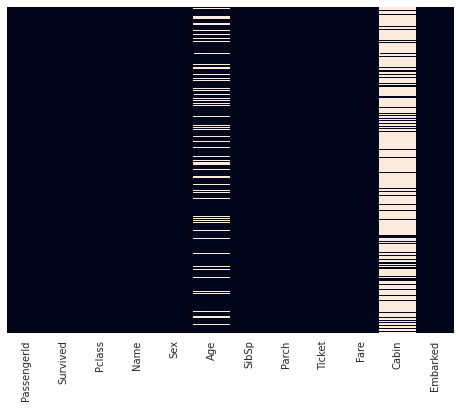

In [ ]:
#Visualizing the missing values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

#**2. Handling Missing Values**


Reference :

https://www.analyticsvidhya.com/blog/2021/05/dealing-with-missing-values-in-python-a-complete-guide/

https://www.analyticsvidhya.com/blog/2021/10/a-complete-guide-to-dealing-with-missing-values-in-python/

https://towardsdatascience.com/how-to-deal-with-missing-data-in-python-1f74a9112d93

https://medium.com/analytics-vidhya/feature-engineering-part-1-mean-median-imputation-761043b95379

https://towardsdatascience.com/missing-value-handling-imputation-and-advanced-models-11a67f551b83

https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/

https://medium.com/analytics-vidhya/ways-to-handle-categorical-column-missing-data-its-implementations-15dc4a56893



##***Importance of filling the missing values***
The concept of missing values is important to comprehend in order to efficiently manage data. If the researcher, programmer, or academician does not properly handle the missing figures, he or she may get to the wrong conclusion about the data, which will have a significant impact on the modelling phase. It is a significant problem in data analysis since it has an impact on the outcomes. It’s difficult to have total faith in the insights when you know that several items are missing data. It may reduce the statistical power of research and lead to erroneous results owing to skewed estimates.

**Problems due to missing values**
Statistical power, or the chance that the test would reject the null hypothesis when it is erroneous, is lowered in the absence of evidence.
The loss of data might cause parameter estimations to be skewed.
It has the ability to reduce the representativeness of the sample.
It might make the analysis of the study more challenging.


The methods I will be discussing are

    1. Deleting the columns with missing data.

    2. Deleting the rows with missing data.

    3. Filling the missing data with a value – Imputation.

    4. Imputation with an additional column.

    5. Filling with a Regression Model.

##***Missing data – Types***
It may be classed into, depending on the pattern or data that is absent in the dataset or data.

**Missing Completely at Random (MCAR)**
When the probability of missing data is unrelated to the precise value to be obtained or the collection of observed answers.

**Missing at Random (MAR)**
When the probability of missing responses is decided by the collection of observed responses rather than the exact missing values expected to be reached.

**Missing not at Random (MNAR)**
Other than the above-mentioned categories, MNAR is the missing data. The MNAR data cases are a pain to deal with. Modelling the missing data is the only way to get a fair approximation of the parameters in this situation.

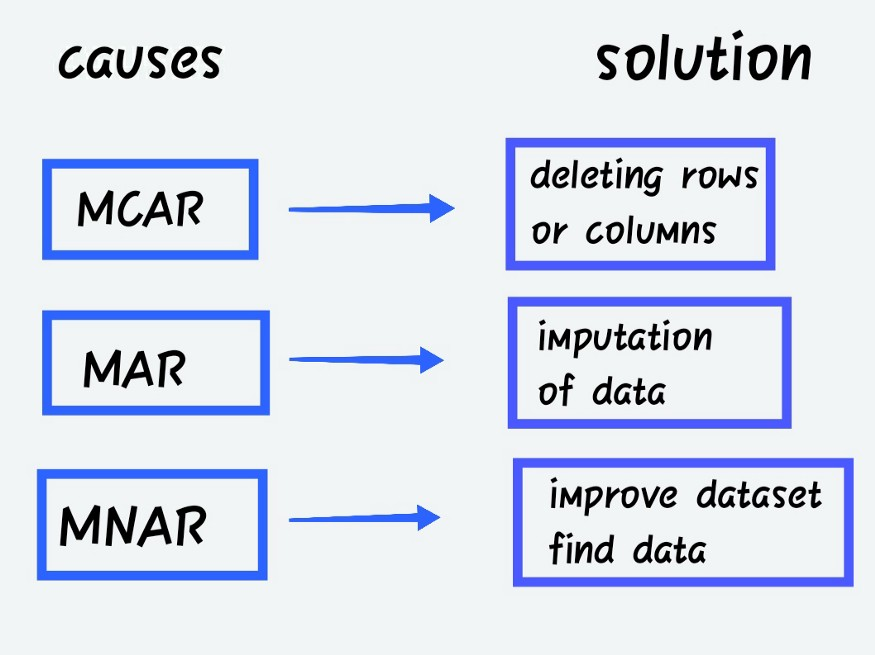

##***Categories of Missing values***
Columns with missing values fall into the following categories:

Continuous variable or feature – Numerical dataset i.e., numbers may be of any kind
Categorical variable or feature – it may be numerical or objective kind. Ex: customer rating: Poor, Satisfactory,
Good, Better, Best, or Gender: Male or Female.
For either of these two kinds of categories only we will be having our dataset.

##***Types of Imputations***
Imputations are available in a range of sizes and forms. It’s one of the approaches for resolving missing data issues in a dataset before modelling our application for more precision.

    1.Univariate imputation, or mean imputation, is when values are imputed using only the target variable.
    2.Multivariate imputation: Impute values depending on other factors, such as estimating missing values based on other variables using linear regression.
    3.Single imputation: To construct a single imputed dataset, only impute any missing values once inside the dataset.
    4.Numerous imputations: imputation of the same missing values multiple times inside the dataset. This essentially entails repeating a single imputation to obtain numerous imputed datasets.

Features Age, Cabin, and Embarked appear to carry missing values. By removing everything, we are left with 20% of the original dataset. This is a significant data drop and will eventually lead to overfitting.

##***1. Deleting the columns with missing data.***

But this is an extreme case and should only be used when there are many null values in the column.

The problem with this method is that we may lose valuable information on that feature, as we have deleted it completely due to some null values.

Should only be used if there are too many null values.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
updated_df=df.dropna(axis=1)

In [ ]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
dtypes: float64(1), int64(5), object(3)
memory usage: 62.8+ KB


In [ ]:
# drop all columns with atleast one NaN
new_df = df.dropna(axis = 1, how ='any')

# drop all columns with all NaN
new_df = df.dropna(axis = 1, how ='all')

The most simple solution to the missing values is to drop the rows or the entire column. There is not an optimum threshold for dropping but you can use 70% as an example value and try to drop the rows and columns which have missing values with higher than this threshold.

In [ ]:
threshold = 0.7

#Dropping rows with missing value rate higher than threshold
new_df = new_df.loc[new_df.isnull().mean(axis=1) < threshold]

##***2. Deleting the row with missing data***

If there is a certain row with missing data, then you can delete the entire row with all the features in that row.

axis=1 is used to drop the column with `NaN` values.

axis=0 is used to drop the row with `NaN` values.

In [ ]:
updated_df = df.dropna(axis=0)

In [ ]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
updated_df =df.dropna(subset=['Age','Cabin','Embarked'],how='any')
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


In [ ]:
updated_df =df.dropna(subset=['Age','Cabin','Embarked'],how='all')
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [ ]:
# drop all rows with atleast one NaN
new_df = df.dropna(axis = 0, how ='any')  

# drop all rows with all NaN
new_df = df.dropna(axis = 0, how ='all')

The most simple solution to the missing values is to drop the rows or the entire column. There is not an optimum threshold for dropping but you can use 70% as an example value and try to drop the rows and columns which have missing values with higher than this threshold.

In [ ]:
threshold = 0.7
#Dropping columns with missing value rate higher than threshold
new_df = new_df[new_df.columns[new_df.isnull().mean() < threshold]]

##***3. Filling the missing data with a value – Imputation.***

In this case, we will be filling the missing values with a certain number.

The possible ways to do this are:

    1.Filling the missing data with the mean or median value if it’s a numerical variable.
    2.Filling the missing data with mode if it’s a categorical value.
    3.Filling the numerical value with 0 or -999, or some other number that will not occur in the data. This can be done so that the machine can recognize that the data is not real or is different.
    4.Filling the categorical value with a new type for the missing values.


>The syntax is the same as imputation with constant only the SimpleImputer strategy will change. It can be “Mean” or “Median” or “Most_Frequent”.

>1. “Mean” will replace missing values using the mean in each column. It is preferred if data is numeric and not skewed.

>2. “Median” will replace missing values using the median in each column. It is preferred if data is numeric and skewed.

>3. “Most_frequent” will replace missing values using the most_frequent in each column. It is preferred if data is a string(object) or numeric.




###**With Mean for numerical features**
We can use the **fillna()** function to fill the null values in the dataset.

In [ ]:
print(df.info())
updated_df = df.copy()
updated_df['Age']=updated_df['Age'].fillna(updated_df['Age'].mean())
print(updated_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Sur

We can use the replace() function to fill the null values in the dataset.

In [ ]:
print(df.info())
updated_df = df.copy()
updated_df['Age']=updated_df['Age'].replace(np.nan,updated_df['Age'].mean())
print(updated_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Sur

###**with Median for numerical features**

In [ ]:
print(df.info())
updated_df = df.copy()
updated_df['Age']=updated_df['Age'].replace(np.nan,updated_df['Age'].median())
print(updated_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Sur

###**With Mode for categorical feature**

In [ ]:
df[['Age','Cabin','Embarked']]

,Age,Cabin,Embarked
0,22.0,NaN,S
1,38.0,C85,C
2,26.0,NaN,S
3,35.0,C123,S
4,35.0,NaN,S
...,...,...,...
886,27.0,NaN,S
887,19.0,B42,S
888,NaN,NaN,S
889,26.0,C148,C


In [ ]:
print(df.info())
updated_df = df.copy()
updated_df['Cabin']=updated_df['Cabin'].fillna(updated_df['Cabin'].mode()[0])
updated_df['Embarked']=updated_df['Embarked'].fillna(updated_df['Embarked'].mode()[0])
print(updated_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Sur

In [ ]:
print(df.info())
updated_df = df.copy()
updated_df['Cabin']=updated_df['Cabin'].replace(np.nan,updated_df['Age'].mode()[0])
updated_df['Embarked']=updated_df['Embarked'].replace(np.nan,updated_df['Age'].mode()[0])
print(updated_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Sur

In [ ]:
print(df.info())
updated_df = df.copy()
updated_df['Cabin']=updated_df['Cabin'].fillna('Unknown')
updated_df['Embarked']=updated_df['Embarked'].fillna('Unknown')
print(updated_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Sur

###**Missing Value Imputation**

In [ ]:
updated_df = df.copy()

In [ ]:
updated_df['MVI_Embarked'] = updated_df.Embarked.fillna("Missing")

#updated_df.sample(20)
updated_df[updated_df['MVI_Embarked']=='Missing']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,MVI_Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Missing
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Missing


##***4. Imputation with an additional column using SimpleImputer***

Use the SimpleImputer() function from sklearn module to impute the values.

Pass the strategy as an argument to the function. It can be either mean or mode or median.

The problem with the previous model is that the model does not know whether the values came from the original data or the imputed value. To make sure the model knows this, we are adding Ageismissing the column which will have True as value, if it is a null value and False if it is not a null value.

In [ ]:
df=dfraw.copy()
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [ ]:
updated_df = df.loc[:,['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp',
       'Parch', 'Fare']]
updated_df['Ageismissing'] = updated_df['Age'].isnull()
updated_df.sample(5)
print(updated_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Age           714 non-null    float64
 4   SibSp         891 non-null    int64  
 5   Parch         891 non-null    int64  
 6   Fare          891 non-null    float64
 7   Ageismissing  891 non-null    bool   
dtypes: bool(1), float64(2), int64(5)
memory usage: 49.7 KB
None


In [ ]:
updated_df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Age             177
SibSp             0
Parch             0
Fare              0
Ageismissing      0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
newdata=pd.DataFrame(imputer.fit_transform(updated_df))
newdata.columns=updated_df.columns
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    float64
 1   Survived      891 non-null    float64
 2   Pclass        891 non-null    float64
 3   Age           891 non-null    float64
 4   SibSp         891 non-null    float64
 5   Parch         891 non-null    float64
 6   Fare          891 non-null    float64
 7   Ageismissing  891 non-null    float64
dtypes: float64(8)
memory usage: 55.8 KB


In [ ]:
newdata.head(10)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Ageismissing
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,0.0
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,0.0
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,0.0
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,0.0
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,0.0
5,6.0,0.0,3.0,28.0,0.0,0.0,8.4583,1.0
6,7.0,0.0,1.0,54.0,0.0,0.0,51.8625,0.0
7,8.0,0.0,3.0,2.0,3.0,1.0,21.0750,0.0
8,9.0,1.0,3.0,27.0,0.0,2.0,11.1333,0.0
9,10.0,1.0,2.0,14.0,1.0,0.0,30.0708,0.0


##***5. Filling with a Regression Model.***

##***6.Replacing NaNs with the value from the previous row or the next row***

**using method = 'pad’ for taking values from the previous row.**

In [ ]:
print(df.info())
updated_df = df.copy()
updated_df['Cabin']=updated_df['Cabin'].fillna(method='pad')
updated_df['Embarked']=updated_df['Embarked'].fillna(method='pad')
print(updated_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Sur

**using method = 'bfill’ for taking values from the next row.**

In [ ]:
print(df.info())
updated_df = df.copy()

updated_df['Cabin']=updated_df['Cabin'].fillna(method='bfill' )
updated_df['Cabin']=updated_df['Cabin'].fillna(method='ffill' )

updated_df['Embarked']=updated_df['Embarked'].fillna(method='bfill')
updated_df['Embarked']=updated_df['Embarked'].fillna(method='ffill')


updated_df['Age']=updated_df['Age'].fillna(method='bfill')
updated_df['Age']=updated_df['Age'].fillna(method='ffill')

print(updated_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Sur

##**7.Using the interpolate method**

interpolate() function is used to fill NaN values using various interpolation techniques.

In [ ]:
print(df.info())
updated_df = df.copy()
updated_df['Age']=updated_df['Age'].interpolate(method='linear', direction = 'both')
print(updated_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Sur

##**8.End of Distribution Imputation**

In the “end of distribution imputation” technique, missing values are replaced by a value that exists at the end of the distribution. To find the end of distribution value, you simply add the mean value with the three positive standard deviations. This technique is ideal for data that closely models a normal distribution, since three standard deviations contain ~99.7% of the data, according to the empirical rule.

Reference: 
https://wellsr.com/python/handling-missing-values-in-python-machine-learning-datasets/

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

It’s clearly not a perfect normal distribution, but the end of distribution value should occur at the end of the distribution, somewhere between 70 and 80.


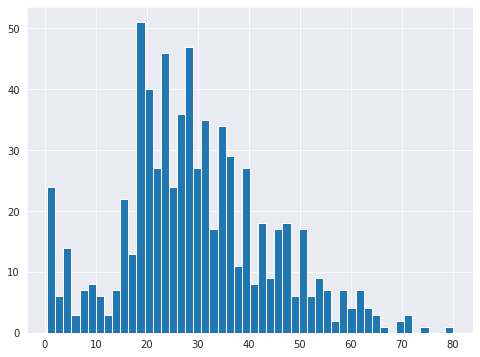

In [ ]:
plt.rcParams["figure.figsize"] = [8,6]
sns.set_style("darkgrid")

updated_df = df.copy()
updated_df.Age.hist(bins=50)

print('It’s clearly not a perfect normal distribution, but the end of distribution value should occur at the end of the distribution, somewhere between 70 and 80.')

In [ ]:
end_distribution_val = updated_df.Age.mean() + 3 * updated_df.Age.std()
print(end_distribution_val)

73.27860964406095


The end of distribution value is 73.27 for the age column. The following script creates a new column Eod_Age where missing values in the age column are replaced by the end of distribution value, 73.27.

In [ ]:
updated_df['Eod_Age'] = updated_df.Age.fillna(end_distribution_val)

updated_df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Eod_Age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.00000
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.00000
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.00000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.00000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.00000
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,73.27861
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,54.00000
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,2.00000
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,27.00000
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,14.00000


##**9.Arbitrary Value imputation**

In arbitrary value imputation, you simply replace the null values by some arbitrary value. The arbitrary value should not be present in the dataset and should be quite different from the existing values. A common choice for arbitrary value is any combination of 9s, like 99,9999. Alternately, in cases where all the values in a column are positive, you can choose -1 as an arbitrary value. The following script replaces missing values with an arbitrary value of 99.

In [ ]:
updated_df = df.copy()

In [ ]:
updated_df['AVI_Age'] = updated_df.Age.fillna(99)

updated_df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AVI_Age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,99.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,54.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,2.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,27.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,14.0


##**10. KNN Impute for numerical Features**

In [ ]:
updated_df = df.copy()

In [ ]:
missing_df = updated_df[['Age']]#,'Cabin','Embarked'
missing_df.sample(10)

,Age
188,40.0
316,24.0
493,71.0
655,24.0
722,34.0
168,NaN
174,56.0
864,24.0
116,70.5
67,19.0


In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
imputer = KNNImputer(n_neighbors=2)
#new_df=pd.DataFrame(imputer.fit_transform(missing_df))
updated_df['age_knn']=imputer.fit_transform(missing_df)
updated_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_knn
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.000000
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.000000
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.000000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.000000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.000000
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,29.699118
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,54.000000
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,2.000000
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,27.000000
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,14.000000


##**11.KNN Impute All Categorical Features**

References: 
https://medium.com/@kyawsawhtoon/a-guide-to-knn-imputation-95e2dc496e

In [ ]:
updated_df = df.copy()

In [ ]:
missing_df = updated_df[['Sex','Embarked']]#
missing_df.sample(10)

,Sex,Embarked
554,female,S
642,female,S
845,male,S
467,male,S
812,male,S
159,male,S
598,male,C
657,female,Q
132,female,S
229,female,S


In [ ]:
cat_dummies = pd.get_dummies(missing_df, drop_first=True)
cat_dummies.head()

,Sex_male,Embarked_Q,Embarked_S
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1


In [ ]:
missing_df = missing_df.drop(['Sex', 'Embarked'], axis=1)
missing_df = pd.concat([missing_df, cat_dummies], axis=1)
missing_df.head()

,Sex_male,Embarked_Q,Embarked_S
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1


Another critical point here is that the KNN Imptuer is a distance-based imputation method and it requires us to normalize our data. Otherwise, the different scales of our data will lead the KNN Imputer to generate biased replacements for the missing values. For simplicity, we will use Scikit-Learn’s MinMaxScaler which will scale our variables to have values between 0 and 1.


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
new_df3 = pd.DataFrame(scaler.fit_transform(missing_df), columns = missing_df.columns)
new_df3.head()

,Sex_male,Embarked_Q,Embarked_S
0,1.0,0.0,1.0
1,0.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,1.0,0.0,1.0


Now that our dataset has dummy variables and normalized, we can move on to the KNN Imputation. Let’s import it from Scikit-Learn’s Impute package and apply it to our data. In this example, we are setting the parameter ‘n_neighbors’ as 5. So, the missing values will be replaced by the mean value of 5 nearest neighbors measured by Euclidean distance.

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
new_df3 = pd.DataFrame(imputer.fit_transform(new_df3),columns = new_df3.columns)
new_df3.head(10)

,Sex_male,Embarked_Q,Embarked_S
0,1.0,0.0,1.0
1,0.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,1.0,0.0,1.0
5,1.0,1.0,0.0
6,1.0,0.0,1.0
7,1.0,0.0,1.0
8,0.0,0.0,1.0
9,0.0,0.0,0.0


In [ ]:
new_df3.isnull().sum()

Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

**Method 2**

In [ ]:
updated_df = df.copy()
missing_df = updated_df[['Sex','Embarked']]#
missing_df.sample(10)

,Sex,Embarked
442,male,S
538,male,S
489,male,S
362,female,C
21,male,S
479,female,S
224,male,S
58,female,S
457,female,S
799,female,S


In [ ]:
from sklearn.preprocessing import LabelEncoder
missing_df = missing_df.apply(lambda series: pd.Series(LabelEncoder().fit_transform(series[series.notnull()]),
                                                index = series[series.notnull()].index)
                    )
missing_df.head()

,Sex,Embarked
0,1,2.0
1,0,0.0
2,0,2.0
3,0,2.0
4,1,2.0


In [ ]:
imputer = KNNImputer(n_neighbors = 1)
#data = imputer.fit_transform(missing_df)

'''
updated_df['age_knn']=imputer.fit_transform(missing_df)
updated_df.head(10)
'''
data = pd.DataFrame(imputer.fit_transform(missing_df),columns=missing_df.columns)

In [ ]:
data.head()

,Sex,Embarked
0,1.0,2.0
1,0.0,0.0
2,0.0,2.0
3,0.0,2.0
4,1.0,2.0


##**12.Iterative Imputer**



Use sklearn.impute.IterativeImputer and replicate a MissForest imputer for mixed data (but you will have to processe separately numeric from categorical features)

In [ ]:
updated_df = df.copy()
missing_df = updated_df[['Age','Sex','Embarked']]#
missing_df.sample(10)

,Age,Sex,Embarked
114,17.0,female,C
847,35.0,male,C
796,49.0,female,S
864,24.0,male,S
653,NaN,female,Q
39,14.0,female,C
666,25.0,male,S
765,51.0,female,S
192,19.0,female,S
612,NaN,female,Q


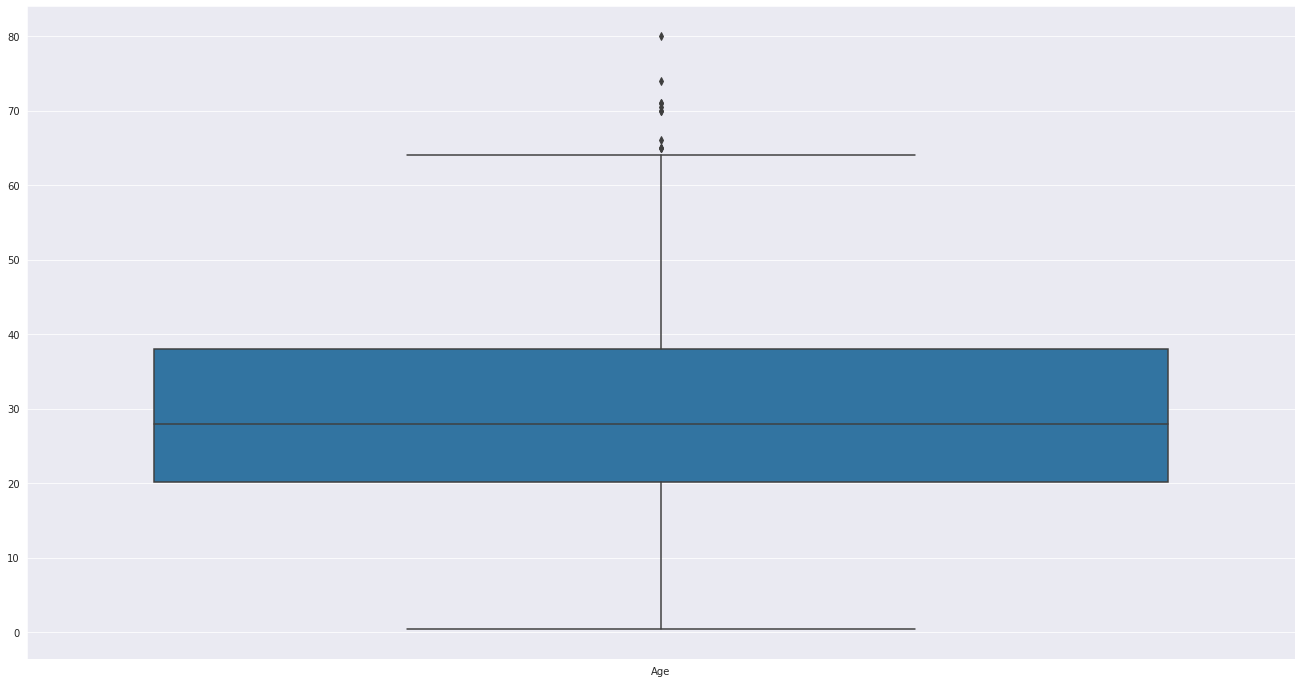

In [ ]:
plt.figure(figsize=(50,12))
plt.subplot(1,2,2)
sns.boxplot(data=missing_df)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [ ]:
categorical = ['Sex','Embarked']
numerical = ['Age']

In [ ]:
missing_df[categorical] = missing_df[categorical].apply(lambda series: pd.Series(
       LabelEncoder().fit_transform(series[series.notnull()]),
       index = series[series.notnull()].index
    ))
print(missing_df)

      Age  Sex  Embarked
0    22.0    1       2.0
1    38.0    0       0.0
2    26.0    0       2.0
3    35.0    0       2.0
4    35.0    1       2.0
..    ...  ...       ...
886  27.0    1       2.0
887  19.0    0       2.0
888   NaN    0       2.0
889  26.0    1       0.0
890  32.0    1       1.0

[891 rows x 3 columns]


In [ ]:
iterativeImputer_numerical = IterativeImputer(estimator = RandomForestRegressor(),initial_strategy = 'mean',max_iter = 10, random_state = 0)

In [ ]:
iterativeImputer_categorical = IterativeImputer(estimator = RandomForestClassifier(), initial_strategy = 'most_frequent', max_iter = 10, random_state = 0)

In [ ]:
missing_df[numerical] = iterativeImputer_numerical.fit_transform(missing_df[numerical])
missing_df[categorical] = iterativeImputer_categorical.fit_transform(missing_df[categorical])

In [ ]:
missing_df.head(10)

,Age,Sex,Embarked
0,22.000000,1.0,2.0
1,38.000000,0.0,0.0
2,26.000000,0.0,2.0
3,35.000000,0.0,2.0
4,35.000000,1.0,2.0
5,29.699118,1.0,1.0
6,54.000000,1.0,2.0
7,2.000000,1.0,2.0
8,27.000000,0.0,2.0
9,14.000000,0.0,0.0


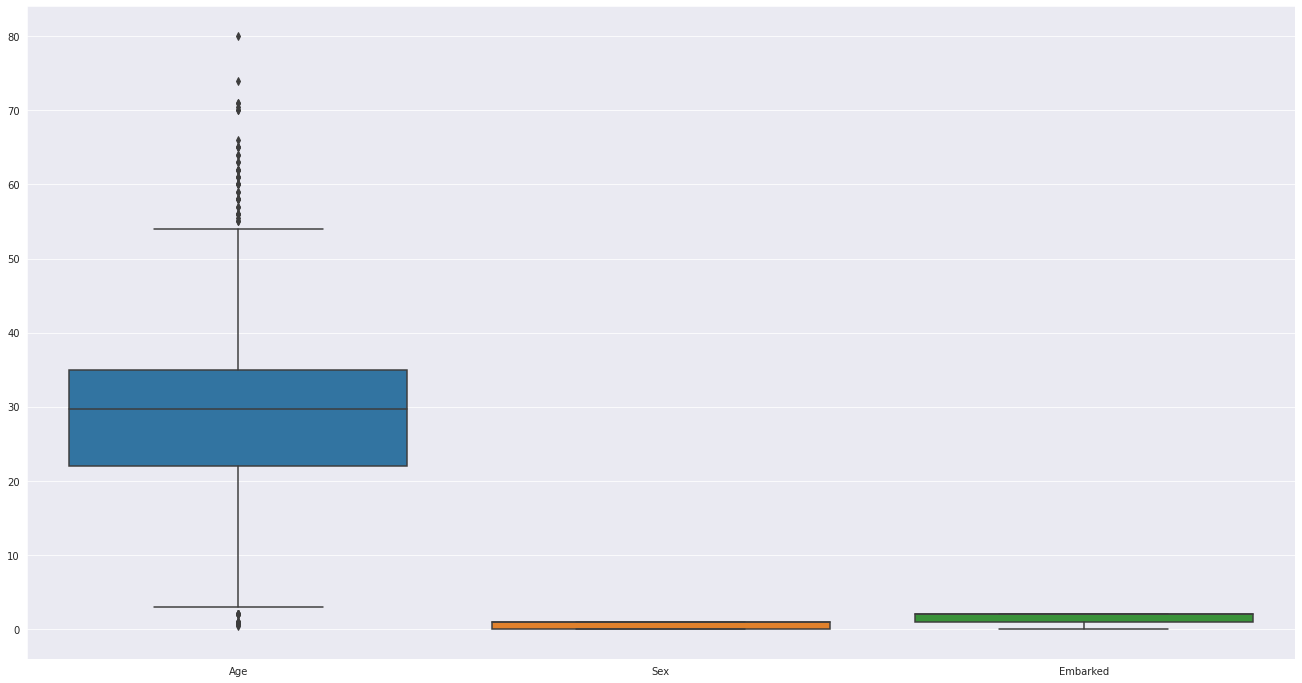

In [ ]:
plt.figure(figsize=(50,12))
plt.subplot(1,2,2)
sns.boxplot(data=missing_df)
plt.show()

##** **

In [ ]:
updated_df = df.copy()
updated_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
categorical = ['Sex','Embarked']
for ColName in categorical:
  updated_df[ColName] = np.where(updated_df[ColName].isnull(),"Unknown",updated_df[ColName])

In [ ]:
updated_df['Embarked'].unique()

array(['S', 'C', 'Q', 'Unknown'], dtype=object)

#**3. Handling Categorical Data**

There can be two kinds of categorical data:

> * Nominal data
> * Ordinal data

> * **Nominal data:** This type of categorical data consists of the name variable without any numerical values. For example, in any organization, the name of the different departments like research and development department, human resource department, accounts and billing department etc.


> * **Ordinal data:** This type of categorical data consists of a set of orders or scales. For example, a list of patients consists of the level of sugar present in the body of a person which can be divided into high, low and medium classes.

##**To find the categorical features from the given data frame**

In [ ]:
updated_df = df.copy()

In [ ]:
def find_categorical_features(df, threshhold):
  cols=df.columns
  i=0
  features=[]
  count=[]
  for col in cols:
      if len(df[col].unique())<=threshhold:
          features.append(col)
          count.append(len(df[col].unique()))
          i=i+1
  return pd.DataFrame( list(zip(features, count)),columns =['features', 'unique_count'])

In [ ]:
newdf = find_categorical_features(updated_df, 30)
newdf

,features,unique_count
0,Survived,2
1,Pclass,3
2,Sex,2
3,SibSp,7
4,Parch,7
5,Embarked,4


In [ ]:
updated_df = df.copy()

In [ ]:
updated_df['Embarked'] = np.where(updated_df['Embarked'].isnull(),"Unknown",updated_df['Embarked'])

In [ ]:
updated_df[newdf.features.values].isnull().sum()

Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [ ]:
updated_df[newdf.features.values].dtypes

Survived     int64
Pclass       int64
Sex         object
SibSp        int64
Parch        int64
Embarked    object
dtype: object

##**Create Dummies**
Description: Create dummies or binary type columns for each category in the object/ category type feature. The value for each row is 1 if that category is available in that row else 0. To create dummies use pandas get_dummies() function.

**Advantage:**

Easy to use and fast way to handle categorical column values.

**Disadvantage:**

get_dummies method is not useful when data have many categorical columns.
If the category column has many categories leads to add many features into the dataset.

Hence, This method is only useful when data having less categorical columns with fewer categories.

**Why OneHotEncoder is better than get_dummies**

Now, although both approaches give the same result, OneHotEncoder is generally preferred over get_dummies due to the following reasons:

>Under OneHotEncoder, our original data frame remains the same size and therefore it is much easier for us to manage and explore.

>OneHotEncoder can be incorporated as part of a machine learning pipeline using Scikit-learn whereas get_dummies require a more manual approach to feature encoding. This makes OneHotEncoder more efficient at transforming both the training set as well as the test set when we are performing machine learning.

>Under OneHotEncoder, we can use the GridSearch function in Scikit-learn to evaluate and choose the best preprocessing parameters just like how we would use GridSearch to find the best hyperparameters for a machine learning model.

>Cross-validation scores are more reliable under OneHotEncoder than get_dummies.

In [ ]:
dummies_df = pd.get_dummies(updated_df[newdf.features.values])
dummies_df

,Survived,Pclass,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_Unknown
0,0,3,1,0,0,1,0,0,1,0
1,1,1,1,0,1,0,1,0,0,0
2,1,3,0,0,1,0,0,0,1,0
3,1,1,1,0,1,0,0,0,1,0
4,0,3,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,0,1,0,0,1,0
887,1,1,0,0,1,0,0,0,1,0
888,0,3,1,2,1,0,0,0,1,0
889,1,1,0,0,0,1,1,0,0,0


##Encoding Categorical Data

References: 

https://towardsdatascience.com/ways-to-handle-categorical-data-before-train-ml-models-with-implementation-ffc213dc84ec

https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02


https://analyticsindiamag.com/a-complete-guide-to-categorical-data-encoding/


https://analyticsindiamag.com/complete-guide-to-handling-categorical-data-using-scikit-learn/


There are three common approaches for converting ordinal and categorical variables to numerical values. They are:

>1. Ordinal Encoding
>2. One-Hot Encoding
>3. Dummy Variable Encoding

###**1. Label Encoding or Ordinal Encoding**

In ordinal encoding, each unique category value is assigned an integer value.

For example, “red” is 1, “green” is 2, and “blue” is 3.

This is called an ordinal encoding or an integer encoding and is easily reversible. Often, integer values starting at zero are used.


The main distinction between LabelEncoder and OrdinalEncoder is their purpose:

  * LabelEncoder should be used for target variables,
  * OrdinalEncoder should be used for feature variables.

In general they work the same, but:

  * LabelEncoder needs y: array-like of shape [n_samples],
  * OrdinalEncoder needs X: array-like, shape [n_samples, n_features].

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ord_encode=OrdinalEncoder( )
result = ord_encode.fit_transform(updated_df[newdf.features.values].Sex.values.reshape(-1,1))
print(ord_encode.categories_)
print(ord_encode.inverse_transform(result)[0:10])

[array(['female', 'male'], dtype=object)]
[['male']
 ['female']
 ['female']
 ['female']
 ['male']
 ['male']
 ['male']
 ['male']
 ['female']
 ['female']]


In [ ]:
from sklearn.preprocessing import LabelEncoder

lab_enc = LabelEncoder()
result = lab_enc.fit_transform(updated_df[newdf.features.values].Sex.values.reshape(-1,1))

print(lab_enc.classes_)
print(lab_enc.inverse_transform(result)[0:10])

['female' 'male']
['male' 'female' 'female' 'female' 'male' 'male' 'male' 'male' 'female'
 'female']


### **2. One-Hot Encoding** 
In One-Hot Encoding, each category of any categorical variable gets a new variable. It maps each category with binary numbers (0 or 1). This type of encoding is used when the data is nominal. Newly created binary features can be considered dummy variables. After one hot encoding, the number of dummy variables depends on the number of categories presented in the data.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#updated_df[newdf.features.values].Sex.values
ohe = OneHotEncoder()
ohe_df =pd.DataFrame(ohe.fit_transform(updated_df[newdf.features.values].Sex.values.reshape(-1,1)).toarray())
ohe_df.columns=ohe.get_feature_names()
for col in ohe_df.columns:
  old = col
  new=' Sex_'+str(col.split('_')[1])
  ohe_df.rename({old:new}, axis=1, inplace=True)

ohe_df.head(10)

,Sex_female,Sex_male
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,1.0,0.0
9,1.0,0.0


###**4. Target/Guided Encoding**

Description: Here, the category of the column has been replaced with its depending join probability ranking with respect to Target column.

Advantages:

It doesn’t affect the volume of the data i.e not add any extra features.
Helps the machine learning model to learn faster.

Disadvantages:

Typically, mean or joint probability encoding leads for over-fitting.
Hence, to avoid overfitting cross-validation or some other approach is required most of the time.

In [ ]:
updated_df = df.copy()
updated_df['Cabin'] = np.where(updated_df['Cabin'].isnull(),"Unknown",updated_df['Cabin'])
updated_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S


In [ ]:
updated_df['Cabin'] = updated_df['Cabin'].astype(str).str[0]
updated_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S


In [ ]:
print(updated_df.groupby(['Cabin'])['Survived'].mean())
Encoded_Lables = updated_df.groupby(['Cabin'])['Survived'].mean().sort_values().index
print(Encoded_Lables)
Encoded_Lables_Ranks = { k:i for i, k in enumerate(Encoded_Lables.sort_values(), 1) }
print(Encoded_Lables_Ranks)
updated_df['Cabin_Encoded'] = updated_df['Cabin'].map(Encoded_Lables_Ranks)
updated_df.drop(labels=['Cabin'], axis=1, inplace=True)
updated_df.head()

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
T    0.000000
U    0.299854
Name: Survived, dtype: float64
Index(['T', 'U', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')
{'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T': 8, 'U': 9}


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_Encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,9
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,9
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,9


###**5. Mean Encoding**

Description: Simillar to target/guided encoding only difference is here we replace category with the mean value with respect to target column. Here also we implement with cabin and survived target column.

Advantages:

>1. Capture information within labels or categories, rendering more predictive features.

>2. Create a monotonous relationship between the independent variable and the target variable.

Disadvantages:
> 1. May leads to overfit the model, to overcome this problem cross-validation is use most of the time.

In [ ]:
updated_df = df.copy()
updated_df['Cabin'] = np.where(updated_df['Cabin'].isnull(),"Unknown",updated_df['Cabin'])
updated_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S


In [ ]:
Data=updated_df
Encoded_Mean_Dict = Data.groupby(['Cabin'])['Survived'].mean().to_dict()

Data['Cabin_Mean_Encoded'] = Data['Cabin'].map(Encoded_Mean_Dict)
# Display result
Data[['Cabin','Cabin_Mean_Encoded']].head()

Data = Data.drop('Cabin', axis = 1)

Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_Mean_Encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0.299854
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1.000000
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0.299854
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0.500000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0.299854


### **6.Probability Ratio Encoding**
Description: Here category of the column is replaced with a probability ratio with respect to Target variable. Here I am using Cabin as an independent variable and its categories is replaced with a probability ratio of person Survived vs Died in each cabin.

Advantages:

>Not increase any extra feature.

>Captures information within the labels or category hence creates more predictive features.

>Creates a monotonic relationship between the variables and the target. So it’s suitable for linear models.

Disadvantages:

>Not defined when the denominator is 0.

>Same as the above two methods lead to overfitting to avoid and validate usually cross-validation has been performed.


In [ ]:
updated_df = df.copy()
updated_df['Cabin'] = np.where(updated_df['Cabin'].isnull(),"Unknown",updated_df['Cabin'])
updated_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S


In [ ]:
Data = updated_df
Data['Cabin']  = Data['Cabin'].astype(str).str[0]

Probability_Survived = Data.groupby(['Cabin'])['Survived'].mean()
Probability_Survived = pd.DataFrame(Probability_Survived)
print(Probability_Survived)

Probability_Survived['Died'] = 1 - Probability_Survived['Survived']

Probability_Survived['Prob_Ratio'] = Probability_Survived['Survived'] / Probability_Survived['Died']

Encode_Prob_Ratio = Probability_Survived['Prob_Ratio'].to_dict()

Data['Encode_Prob_Ratio'] = Data['Cabin'].map(Encode_Prob_Ratio)

print(Data[['Cabin','Encode_Prob_Ratio']].head(10))

Data = Data.drop('Cabin', axis = 1)

print(Data.head(5))

       Survived
Cabin          
A      0.466667
B      0.744681
C      0.593220
D      0.757576
E      0.750000
F      0.615385
G      0.500000
T      0.000000
U      0.299854
  Cabin  Encode_Prob_Ratio
0     U           0.428274
1     C           1.458333
2     U           0.428274
3     C           1.458333
4     U           0.428274
5     U           0.428274
6     E           3.000000
7     U           0.428274
8     U           0.428274
9     U           0.428274
   PassengerId  Survived  Pclass  ...     Fare Embarked  Encode_Prob_Ratio
0            1         0       3  ...   7.2500        S           0.428274
1            2         1       1  ...  71.2833        C           1.458333
2            3         1       3  ...   7.9250        S           0.428274
3            4         1       1  ...  53.1000        S           1.458333
4            5         0       3  ...   8.0500        S           0.428274

[5 rows x 12 columns]


###**7. Effect Encoding**

In this type of encoding, encoders provide values to the categories in -1,0,1 format. -1 formation is the only difference between One-Hot encoding and effect encoding.

Here in the above output, we can see that the encoder has given -1 to female in every dummy variable. This is how a dummy variable is generated by the consists of -1,0 and 1 as an encoded category.

In [ ]:
import category_encoders as ce

In [ ]:
updated_df = df.copy()
#updated_df['Cabin'] = np.where(updated_df['Cabin'].isnull(),"Unknown",updated_df['Cabin'])
#updated_df.head(5)

In [ ]:
encoder=ce.sum_coding.SumEncoder(cols='Sex',verbose=False)

In [ ]:
newdf= encoder.fit_transform(updated_df)
newdf

,intercept,PassengerId,Survived,Pclass,Name,Sex_0,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,0,3,"Braund, Mr. Owen Harris",1.0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",-1.0,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,1,3,"Heikkinen, Miss. Laina",-1.0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",-1.0,35.0,1,0,113803,53.1000,C123,S
4,1,5,0,3,"Allen, Mr. William Henry",1.0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,887,0,2,"Montvila, Rev. Juozas",1.0,27.0,0,0,211536,13.0000,NaN,S
887,1,888,1,1,"Graham, Miss. Margaret Edith",-1.0,19.0,0,0,112053,30.0000,B42,S
888,1,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",-1.0,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,890,1,1,"Behr, Mr. Karl Howell",1.0,26.0,0,0,111369,30.0000,C148,C


###**8. Hash Encoder**
Just like One-Hot encoding, the hash encoder converts the category into binary numbers using new data variables but here we can fix the number of new data variables. Before going to the implementation we should know about hashing. So hashing is used for the transformation of arbitrary size input in the form of a fixed-size value.

Hashing is a one-way technique of encoding which is unlike other encoders. The Hash encoder’s output can not be converted again into the input. That is why we can say it may cause loss of information from the data. It should be applied with high dimension data in terms of categorical values.

In the above example, we implemented a hashing encoder for 6 dummy variables instead of 8 dummy variables just by using n_encoding = 6.

In [ ]:
data=pd.DataFrame({'Month':['January','April','March','April','Februay','June','July','June','September']})

#Create object for hash encoder
encoder=ce.HashingEncoder(cols='Month',n_components=6)#Fit and Transform Data
encoder.fit_transform(data)

,col_0,col_1,col_2,col_3,col_4,col_5
0,0,0,0,0,1,0
1,0,0,0,1,0,0
2,0,0,0,0,1,0
3,0,0,0,1,0,0
4,0,0,0,1,0,0
5,0,1,0,0,0,0
6,1,0,0,0,0,0
7,0,1,0,0,0,0
8,0,0,0,0,1,0


###**9. Binary Encoding**

In the hash encoding, we have seen that using hashing can cause the loss of data and on the other hand we have seen in one hot encoding dimensionality of the data is increasing. The binary encoding is a process where we can perform hash encoding look like encoding without losing the information just like one hot encoding.

Basically, we can say that binary encoding is a combination process of hash and one hot encoding.

After implementation, we can see the basic difference between binary and hash and one hot encoding.



Here in the output, we can see that without losing much information we have got encoded data with reduced dimensionality than the One-Hot encoding. This encoding is very helpful in the case of data with a huge amount of categories.

In [ ]:
updated_df = df.copy()
updated_df['Embarked'] = np.where(updated_df['Embarked'].isnull(),"Unknown",updated_df['Embarked'])
updated_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
updated_df['Embarked'].unique()

array(['S', 'C', 'Q', 'Unknown'], dtype=object)

In [ ]:
encoder= ce.BinaryEncoder(cols=['Embarked'],return_df=True)
updated_df=encoder.fit_transform(updated_df)
updated_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_0,Embarked_1,Embarked_2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,0,1,0


###**9. Base-N Encoding**

In a positional number system, base or radix is the number of unique digits including zero used to represent numbers. In base n encoding if the base is two then the encoder will convert categories into the numerical form using their respective binary form which is formally one-hot encoding. But if we change the base to 10 which means the categories will get converted into numeric form between 0-9.

In the above output, we can see that we have used base 5. Somewhere it is pretty simple to the binary encoding but where in binary we have got 4 dimensions after conversion here we have 3 dimensions only and also the numbers are varying between 0-4. 

If we do not define the base by default it is set to 2 which basically performs the binary encoding.

In [ ]:
updated_df = df.copy()
updated_df['Embarked'] = np.where(updated_df['Embarked'].isnull(),"Unknown",updated_df['Embarked'])
updated_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Create an object for Base N Encoding
encoder= ce.BaseNEncoder(cols=['Embarked'],return_df=True,base=5)

#Fit and Transform Data
data_encoded=encoder.fit_transform(updated_df)

data_encoded.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_0
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,3
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,2


###**10. Label Binarizer**
Scikit-learn also supports binary encoding by using the LabelBinarizer. We use a similar process as above to transform the data for the process of creating a pandas DataFrame.

In [ ]:
updated_df = df.copy()
updated_df['Embarked'] = np.where(updated_df['Embarked'].isnull(),"Unknown",updated_df['Embarked'])
updated_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
from sklearn.preprocessing import LabelBinarizer
lb_style = LabelBinarizer()
lb_results = lb_style.fit_transform(updated_df["Embarked"])
pd.DataFrame(lb_results, columns=lb_style.classes_).value_counts()

C  Q  S  Unknown
0  0  1  0          644
1  0  0  0          168
0  1  0  0           77
   0  0  1            2
dtype: int64

### **11. Count/Frequency Encoder**

Another way to refer to variables that have a multitude of categories is to call them variables with high cardinality. If we have categorical variables containing many multiple labels or high cardinality, then by using one-hot encoding, we will expand the feature space dramatically. Replacing categorical variables with their frequency this is the number of times each label appears in the dataset. 

It is very simple to implement and does not increase the feature dimensional space. But if some of the labels have the same count, then they will be replaced with the same count and they will lose some valuable information. Adds somewhat arbitrary numbers, and therefore weights to the different labels, that may not be related to their predictive power.

In [ ]:
updated_df = df.copy()
updated_df['Embarked'] = np.where(updated_df['Embarked'].isnull(),"Unknown",updated_df['Embarked'])
updated_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_frequency_map = updated_df.Embarked.value_counts().to_dict()
updated_df.Embarked = updated_df.Embarked.map(df_frequency_map)
df_frequency_map

{'C': 168, 'Q': 77, 'S': 644, 'Unknown': 2}

In [ ]:
updated_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,644
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,168
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,644
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,644
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,644
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,77
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,644
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,644
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,644
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,168


#**4. Handling imbalanced data**

Why need to handle imbalanced data? Because of to reduce overfitting and underfitting problem.

suppose a feature has a factor level2(0 and 1). it consists of 1’s is 5% and 0’s is 95%. It is called imbalanced data.

eg:the shape of the training datase is
0: 190430 transcations
1: 330 transcations

By preventing this problem there are some methods:

updated_df = df.copy()
updated_df.columns

In [ ]:
updated_df = df.copy()
updated_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
updated_df = df[['Survived', 'Pclass', 'Sex', 'Age','Embarked']]
updated_df.shape

(891, 5)

In [ ]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   Embarked  889 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 34.9+ KB


In [ ]:
numerical=updated_df.select_dtypes(include=['int64', 'float64'])
categorical=updated_df.select_dtypes(exclude=['int64', 'float64'])

print(numerical)
print(categorical)

     Survived  Pclass   Age
0           0       3  22.0
1           1       1  38.0
2           1       3  26.0
3           1       1  35.0
4           0       3  35.0
..        ...     ...   ...
886         0       2  27.0
887         1       1  19.0
888         0       3   NaN
889         1       1  26.0
890         0       3  32.0

[891 rows x 3 columns]
        Sex Embarked
0      male        S
1    female        C
2    female        S
3    female        S
4      male        S
..      ...      ...
886    male        S
887  female        S
888  female        S
889    male        C
890    male        Q

[891 rows x 2 columns]


In [ ]:
updated_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Embarked      2
dtype: int64

In [ ]:
simpleimput = SimpleImputer(missing_values=np.nan, strategy='median')
numerical_result= pd.DataFrame(simpleimput.fit_transform(numerical), columns = numerical.columns)
numerical_result.head(10)

,Survived,Pclass,Age
0,0.0,3.0,22.0
1,1.0,1.0,38.0
2,1.0,3.0,26.0
3,1.0,1.0,35.0
4,0.0,3.0,35.0
5,0.0,3.0,28.0
6,0.0,1.0,54.0
7,0.0,3.0,2.0
8,1.0,3.0,27.0
9,1.0,2.0,14.0


In [ ]:
simpleimput = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
categorical_result= pd.DataFrame(simpleimput.fit_transform(categorical), columns = categorical.columns)
categorical_result.head(10)

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
5,male,Q
6,male,S
7,male,S
8,female,S
9,female,C


In [ ]:
updated_df[numerical_result.columns] = numerical_result
updated_df[categorical_result.columns] = categorical_result

In [ ]:
updated_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Embarked    0
dtype: int64

In [ ]:
updated_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Embarked'], dtype='object')

In [ ]:
updated_df.Survived.value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

In [ ]:
x=updated_df[['Pclass', 'Sex', 'Age', 'Embarked']]
y=updated_df['Survived']

##**Under-sampling majority class**

Under-sampling the majority class will resample the majority class points in the data to make them equal to the minority class.

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test, y_train, y_test  =train_test_split(x, y, test_size=0.30, random_state=101)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
under_sample = RandomUnderSampler(random_state=0)
X_sample_under,y_sample_under = under_sample.fit_resample(x, y)

In [ ]:
print(X_sample_under.shape)
print(y_sample_under.shape)

(684, 4)
(684,)


In [ ]:
frames = [X_sample_under, y_sample_under]
result = pd.concat(frames, axis=1)
result.head()

,Pclass,Sex,Age,Embarked,Survived
0,2.0,male,25.0,S,0.0
1,3.0,male,33.0,S,0.0
2,2.0,male,42.0,S,0.0
3,3.0,female,28.0,Q,0.0
4,3.0,male,45.5,C,0.0


In [ ]:
result.Survived.value_counts()

1.0    342
0.0    342
Name: Survived, dtype: int64

In [ ]:
result.shape

(684, 5)

## **Over Sampling Minority class by duplication**
Oversampling minority class will resample the minority class points in the data to make them equal to the majority class.

In [ ]:
from imblearn.over_sampling import RandomOverSampler
over_sample = RandomOverSampler(sampling_strategy='minority',random_state=0)
X_over_sample,y_over_sample = over_sample.fit_resample(x, y)

In [ ]:
print(X_over_sample.shape)
print(y_over_sample.shape)

(1098, 4)
(1098,)


In [ ]:
frames = [X_over_sample, y_over_sample]
result = pd.concat(frames, axis=1)
result.head()

,Pclass,Sex,Age,Embarked,Survived
0,3.0,male,22.0,S,0.0
1,1.0,female,38.0,C,1.0
2,3.0,female,26.0,S,1.0
3,1.0,female,35.0,S,1.0
4,3.0,male,35.0,S,0.0


In [ ]:
result.Survived.value_counts()

1.0    549
0.0    549
Name: Survived, dtype: int64

##**Over Sampling minority class using Synthetic Minority Oversampling Technique (SMOTE)**

In this method, synthetic samples are generated for the minority class and equal to the majority class.

dummies_df = pd.get_dummies(updated_df[newdf.features.values])
dummies_df

In [ ]:
dummies_df = pd.get_dummies(updated_df[categorical.columns])
dummies_df

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1
...,...,...,...,...,...
886,0,1,0,0,1
887,1,0,0,0,1
888,1,0,0,0,1
889,0,1,1,0,0


In [ ]:
frames = [updated_df.drop(labels=['Sex','Embarked'],axis=1), dummies_df]
result = pd.concat(frames, axis=1)
result.head()

,Survived,Pclass,Age,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3.0,22.0,0,1,0,0,1
1,1.0,1.0,38.0,1,0,1,0,0
2,1.0,3.0,26.0,1,0,0,0,1
3,1.0,1.0,35.0,1,0,0,0,1
4,0.0,3.0,35.0,0,1,0,0,1


In [ ]:
result.columns

Index(['Survived', 'Pclass', 'Age', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [ ]:
x=result[['Pclass', 'Age', 'Sex_female', 'Sex_male', 'Embarked_C','Embarked_Q', 'Embarked_S']]
y=result['Survived']

In [ ]:
from imblearn.over_sampling import SMOTE
smot = SMOTE(sampling_strategy='minority')
x_smote, y_smote = smot.fit_resample(x,y)

In [ ]:
frames = [x_smote, y_smote]
result = pd.concat(frames, axis=1)
result.head()

,Pclass,Age,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived
0,3.0,22.0,0,1,0,0,1,0.0
1,1.0,38.0,1,0,1,0,0,1.0
2,3.0,26.0,1,0,0,0,1,1.0
3,1.0,35.0,1,0,0,0,1,1.0
4,3.0,35.0,0,1,0,0,1,0.0


In [ ]:
result.Survived.value_counts()

1.0    549
0.0    549
Name: Survived, dtype: int64

#**5. Detecting & Treating Outliers**

References:

https://www.analyticsvidhya.com/blog/2021/05/feature-transformations-in-data-science-a-detailed-walkthrough/

https://www.kaggle.com/nareshbhat/outlier-the-silent-killer

https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

https://www.kdnuggets.com/2018/12/four-techniques-outlier-detection.html

https://www.fireblazeaischool.in/blogs/outlier-treatment-and-detection/

https://www.codementor.io/@innat_2k14/titanic-kaggle-machine-learning-from-disaster-part-1-10gbvqzguc

https://www.kaggle.com/pmarcelino/data-analysis-and-feature-extraction-with-python

https://www.datacamp.com/community/tutorials/feature-engineering-kaggle




1. What are Outliers?
We all have heard of the idiom ‘odd one out which means something unusual in comparison to the others in a group.

Similarly, an Outlier is an observation in a given dataset that lies far from the rest of the observations. That means an outlier is vastly larger or smaller than the remaining values in the set.

2. Why do they occur?
An outlier may occur due to the variability in the data, or due to experimental error/human error.

They may indicate an experimental error or heavy skewness in the data(heavy-tailed distribution).

3. What do they affect?
In statistics, we have three measures of central tendency namely Mean, Median, and Mode. They help us describe the data.

Mean is the accurate measure to describe the data when we do not have any outliers present.

Median is used if there is an outlier in the dataset.

Mode is used if there is an outlier AND about ½ or more of the data is the same.

‘Mean’ is the only measure of central tendency that is affected by the outliers which in turn impacts Standard deviation.

In [ ]:
updated_df = df[['Survived', 'Pclass', 'Sex', 'Age','Embarked','Fare']]
updated_df.shape

(891, 6)

In [ ]:
updated_df = df[['Survived', 'Pclass', 'Sex', 'Age','Embarked','Fare']]
updated_df['Age']=updated_df['Age'].replace(np.nan,updated_df['Age'].median())
updated_df['Embarked']=updated_df['Embarked'].replace(np.nan,updated_df['Embarked'].mode()[0])
updated_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Embarked    0
Fare        0
dtype: int64

In [ ]:
frames=[numerical_result, categorical_result, updated_df['Fare']]
result = pd.concat(frames, axis=1)

result.head()

,Survived,Pclass,Age,Sex,Embarked,Fare
0,0.0,3.0,22.0,male,S,7.2500
1,1.0,1.0,38.0,female,C,71.2833
2,1.0,3.0,26.0,female,S,7.9250
3,1.0,1.0,35.0,female,S,53.1000
4,0.0,3.0,35.0,male,S,8.0500


In [ ]:
updated_df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
Embarked     object
Fare        float64
dtype: object

In [ ]:
numeric = updated_df.select_dtypes(include=['float64', 'int64'])
numeric.columns

Index(['Survived', 'Pclass', 'Age', 'Fare'], dtype='object')

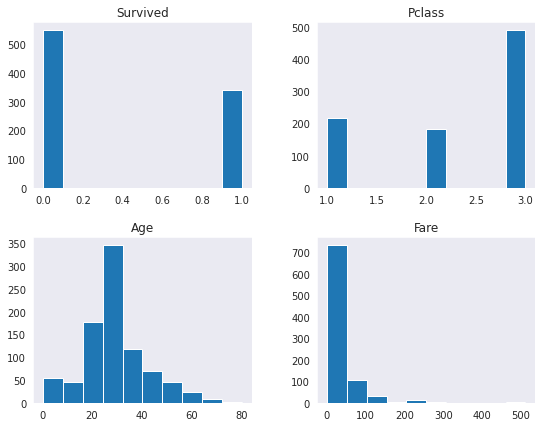

In [ ]:
#for col in numeric.columns:
  #sns.boxplot(x=updated_df[col], data=updated_df)

numeric.hist(bins=10,figsize=(9,7),grid=False);

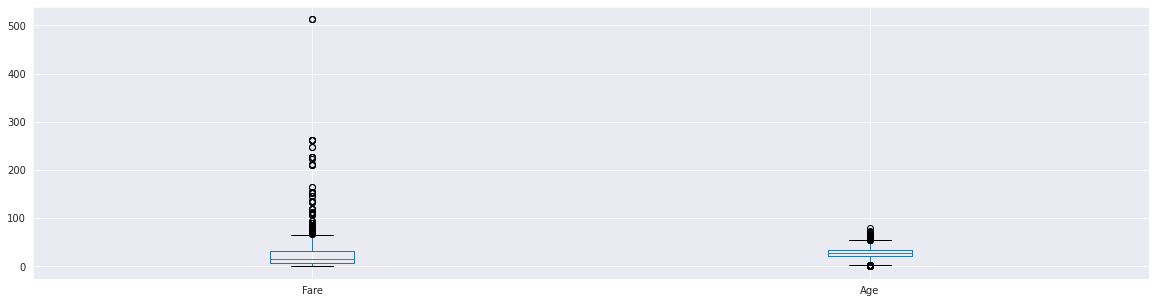

In [ ]:
updated_df.boxplot(['Fare','Age'], figsize=(20,5))

In [ ]:
result.isnull().sum()

Survived    0
Pclass      0
Age         0
Sex         0
Embarked    0
Fare        0
dtype: int64

In [ ]:
result.describe()

,Survived,Pclass,Age,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,32.204208
std,0.486592,0.836071,13.019697,49.693429
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,22.000000,7.910400
50%,0.000000,3.000000,28.000000,14.454200
75%,1.000000,3.000000,35.000000,31.000000
max,1.000000,3.000000,80.000000,512.329200


##**Detecting outliers**

###**Detecting outliers using Boxplot:**

Text(0.5, 0, 'Sample')

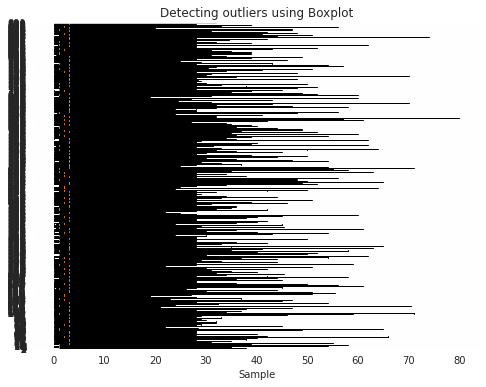

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(result[numerical.columns], vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Sample')

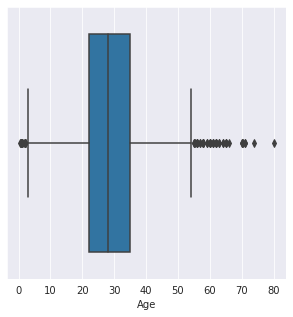

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(result['Age'],data=result)

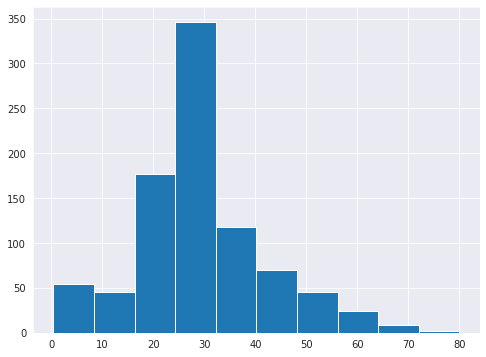

In [ ]:
result['Age'].hist()

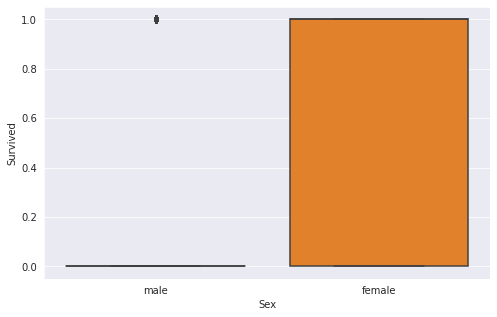

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Sex',y='Survived',data=result)

###**Skewness**
the skewness value should be within the range of -1 to 1 for a normal distribution, any major changes from this value may indicate the presence of outliers.

the code below prints the skewness value of the ‘Fare’ variable.

the skewness value should be within the range of -1 to 1 for a normal distribution, any major changes from this value indicates the presence of extreme value or outlier.

from the code above, the ‘Fare’ skewness value of 4.78 shows the variable has been rightly skewed, indicating the presence of outliers.

In [ ]:
print('skewness value of Age: ',result['Age'].skew())
print('skewness value of Fare: ',result['Fare'].skew())

skewness value of Age:  0.5102446555756495
skewness value of Fare:  4.787316519674893


###**Interquartile Range(IQR)**

The interquartile range is a measure of statistical dispersion and is calculated as the difference between 75th and 25th percentiles. the Quartiles divide the data set into four equal parts. The values that separate parts are called the first, second, and third quartiles.

In [ ]:
Q1=result['Fare'].quantile(0.25)
Q3=result['Fare'].quantile(0.75)
IQR=Q3-Q1
IQR

23.0896

the code below prints the outliers and sets the 25th and 75th percentile of the ‘Fare’ variable respectively which will also be used in flooring and capping in the outliers treatment process.

In [ ]:
Q1 = result['Fare'].quantile(0.25)
Q3 = result['Fare'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
Fare_outliers = result[(result['Fare'] < Q1 - whisker_width*IQR) | (result['Fare'] > Q3 + whisker_width*IQR)]
Fare_outliers.head()

,Survived,Pclass,Age,Sex,Embarked,Fare
1,1.0,1.0,38.0,female,C,71.2833
27,0.0,1.0,19.0,male,S,263.0000
31,1.0,1.0,28.0,female,C,146.5208
34,0.0,1.0,28.0,male,C,82.1708
52,1.0,1.0,49.0,female,C,76.7292


###**Standard Deviation**
Standard deviation measures the amount of variation and dispersion of a set of values relative to the average value of the data, it shows the variability distribution of the data.
A high standard deviation indicates that the values are highly dispersed while a low standard deviation indicates that the variation or dispersion of the values is low.

In [ ]:
fare_mean = result['Fare'].mean()
fare_std = result['Fare'].std()
low= fare_mean -(3 * fare_std)
high= fare_mean + (3 * fare_std)
fare_outliers = result[(result['Fare'] < low) | (result['Fare'] > high)]
fare_outliers.head()

,Survived,Pclass,Age,Sex,Embarked,Fare
27,0.0,1.0,19.0,male,S,263.0000
88,1.0,1.0,23.0,female,S,263.0000
118,0.0,1.0,24.0,male,C,247.5208
258,1.0,1.0,35.0,female,C,512.3292
299,1.0,1.0,50.0,female,C,247.5208


In [ ]:
desc = result.describe().T
desc

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0,0.0,1.0,1.0
Pclass,891.0,2.308642,0.836071,1.00,2.0,3.0,3.0,3.0
Age,891.0,29.361582,13.019697,0.42,22.0,28.0,35.0,80.0


In [ ]:
desc.loc['Pclass':'Age','count':'max']

,count,mean,std,min,25%,50%,75%,max
Pclass,891.0,2.308642,0.836071,1.00,2.0,3.0,3.0,3.0
Age,891.0,29.361582,13.019697,0.42,22.0,28.0,35.0,80.0


###**Z-scores**

In [ ]:
from numpy.ma.core import outer
age_mean= desc.loc['Age','mean']
age_std=desc.loc['Age','std']

threshold = 3
outlier = [] 

for value in result['Age'].values:
  z=(value-age_mean)/age_std
  if z>threshold:
    outlier.append(value)

print(f'Mean age is {age_mean}')
print(f'Std Dev age is {age_std}')    
print(outlier)

Mean age is 29.36158249158249
Std Dev age is 13.019696550973194
[71.0, 70.5, 71.0, 80.0, 70.0, 70.0, 74.0]


**Method 2**

In [ ]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(result[numeric.columns]))
print(z)

threshold = 3
print(np.where(z > 3))

[[0.78927234 0.82737724 0.56573646 0.50244517]
 [1.2669898  1.56610693 0.66386103 0.78684529]
 [1.2669898  0.82737724 0.25833709 0.48885426]
 ...
 [0.78927234 0.82737724 0.1046374  0.17626324]
 [1.2669898  1.56610693 0.25833709 0.04438104]
 [0.78927234 0.82737724 0.20276197 0.49237783]]
(array([ 27,  88,  96, 116, 118, 258, 299, 311, 341, 377, 380, 438, 493,
       527, 557, 630, 672, 679, 689, 700, 716, 730, 737, 742, 745, 779,
       851]), array([3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3,
       3, 3, 2, 3, 2]))


In [ ]:
def detect_outliers_zscore(data):
  outliers = []
  thres = 3
  mean = np.mean(data)
  std = np.std(data)
  # print(mean, std)
  for i in data:
      z_score = (i-mean)/std
      if (np.abs(z_score) > thres):
          outliers.append(i)
  return outliers# Driver code
  
sample_outliers = detect_outliers_zscore(result['Age'].values)
print("Outliers from Z-scores method: ", sample_outliers)

Outliers from Z-scores method:  [71.0, 70.5, 71.0, 80.0, 70.0, 70.0, 74.0]


In [ ]:
def Zscore_outlier(data):
  out=[]
  m = np.mean(data)
  sd = np.std(data)
  for i in data: 
      z = (i-m)/sd
      if np.abs(z) > 3: 
          out.append(i)
  print("Outliers:",out)

In [ ]:
Zscore_outlier(result['Fare'])

Outliers: [263.0, 263.0, 247.5208, 512.3292, 247.5208, 262.375, 263.0, 211.5, 227.525, 263.0, 221.7792, 227.525, 512.3292, 211.3375, 227.525, 227.525, 211.3375, 512.3292, 262.375, 211.3375]


###**Robust Z-SCORE**

It is also called as Median absolute deviation method. It is similar to Z-score method with some changes in parameters. Since mean and standard deviations are heavily influenced by outliers, alter to this parameters we use median and absolute deviation from median.


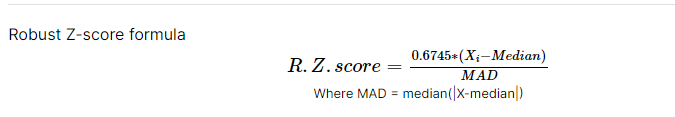

Suppose x follows a standard normal distribution. The MAD will converge to the median of the half normal distribution, which is the 75% percentile of a normal distribution, and N(0.75)≃0.6745.

In [ ]:
def ZRscore_outlier(df):
  out=[]
  med = np.median(df)
  ma = stats.median_absolute_deviation(df)
  for i in df: 
      z = (0.6745*(i-med))/ (np.median(ma))
      if np.abs(z) > 3: 
          out.append(i)
  print("Outliers:",out)

In [ ]:
ZRscore_outlier(result['Fare'])

Outliers: [71.2833, 263.0, 146.5208, 82.1708, 76.7292, 61.9792, 80.0, 83.475, 73.5, 263.0, 61.175, 63.3583, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 61.3792, 69.55, 69.55, 146.5208, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 153.4625, 135.6333, 77.9583, 78.85, 91.0792, 151.55, 247.5208, 151.55, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 75.25, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 263.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 79.2, 78.2667, 153.4625, 65.0, 77.9583, 69.3, 76.7292, 73.5, 113.275, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 71.0, 65.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 69.55, 120.0, 93.5, 80.0, 83.1583, 69.55, 89.1042, 164.8667, 69.55, 83.1583]


###**Inter Quantile Range(IQR)**

In [ ]:
def detect_outliers_iqr(data):
  outliers = []
  data = sorted(data)
  q1 = np.percentile(data, 25)
  q3 = np.percentile(data, 75)
  # print(q1, q3)
  IQR = q3-q1
  lwr_bound = q1-(1.5*IQR)
  upr_bound = q3+(1.5*IQR)
  # print(lwr_bound, upr_bound)
  for i in data: 
      if (i<lwr_bound or i>upr_bound):
          outliers.append(i)
  return outliers# Driver code
sample_outliers = detect_outliers_iqr(result['Age'].values)
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  [0.42, 0.67, 0.75, 0.75, 0.83, 0.83, 0.92, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 55.0, 55.0, 55.5, 56.0, 56.0, 56.0, 56.0, 57.0, 57.0, 58.0, 58.0, 58.0, 58.0, 58.0, 59.0, 59.0, 60.0, 60.0, 60.0, 60.0, 61.0, 61.0, 61.0, 62.0, 62.0, 62.0, 62.0, 63.0, 63.0, 64.0, 64.0, 65.0, 65.0, 65.0, 66.0, 70.0, 70.0, 70.5, 71.0, 71.0, 74.0, 80.0]


In [ ]:
def iqr_outliers(df):
  out=[]
  q1 = df.quantile(0.25)
  q3 = df.quantile(0.75)
  iqr = q3-q1
  Lower_tail = q1 - 1.5 * iqr
  Upper_tail = q3 + 1.5 * iqr
  for i in df:
      if i > Upper_tail or i < Lower_tail:
          out.append(i)
  print("Outliers:",out)

In [ ]:
iqr_outliers(result['Fare'])

Outliers: [71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 146.5208, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 153.4625, 135.6333, 77.9583, 78.85, 91.0792, 151.55, 247.5208, 151.55, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 75.25, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 263.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 79.2, 78.2667, 153.4625, 77.9583, 69.3, 76.7292, 73.5, 113.275, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 71.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 69.55, 120.0, 93.5, 80.0, 83.1583, 69.55, 89.1042, 164.8667, 69.55, 83.1583]


###**Hypothesis Testing (GRUBBS TEST)**

Grubbs' test is defined for the hypothesis:  

Ho:  There are no outliers in the data set 

H1: There is exactly one outlier in the data set 
 
The Grubbs' test statistic is defined as:

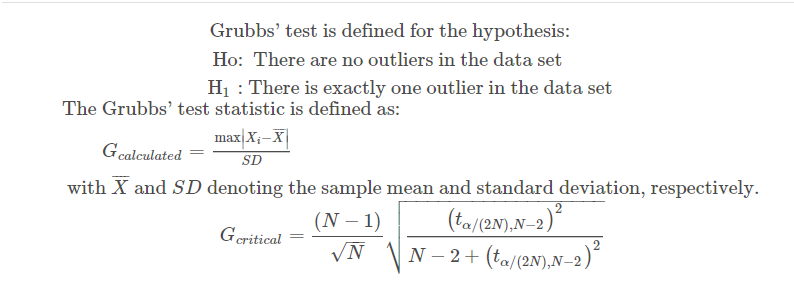

If the calculated value is greater than critical, you can reject the null hypothesis and conclude that one of the values is an outlier

In [ ]:
import scipy.stats as stats
def grubbs_test(x):
    n = len(x)
    mean_x = np.mean(x)
    sd_x = np.std(x)
    numerator = max(abs(x-mean_x))
    g_calculated = numerator/sd_x
    print("Grubbs Calculated Value:",g_calculated)
    t_value = stats.t.ppf(1 - 0.05 / (2 * n), n - 2)
    g_critical = ((n - 1) * np.sqrt(np.square(t_value))) / (np.sqrt(n) * np.sqrt(n - 2 + np.square(t_value)))
    print("Grubbs Critical Value:",g_critical)
    if g_critical > g_calculated:
        print("From grubbs_test we observe that calculated value is lesser than critical value, Accept null hypothesis and conclude that there is no outliers\n")
    else:
        print("From grubbs_test we observe that calculated value is greater than critical value, Reject null hypothesis and conclude that there is an outliers\n")

In [ ]:
grubbs_test(result['Fare'])

Grubbs Calculated Value: 9.667166525013503
Grubbs Critical Value: 4.011373817239155
From grubbs_test we observe that calculated value is greater than critical value, Reject null hypothesis and conclude that there is an outliers



###**WINSORIZATION METHOD(PERCENTILE CAPPING)**

This method is similar to IQR method. If a value exceeds the value of the 99th percentile and below the 1st percentile of given values are treated as outliers.


In [ ]:
def Winsorization_outliers(df):
  out=[]
  q1 = np.percentile(df , 1)
  q3 = np.percentile(df , 99)
  for i in df:
      if i > q3 or i < q1:
          out.append(i)
  print("Outliers:",out)

In [ ]:
Winsorization_outliers(result['Fare'])

Outliers: [263.0, 263.0, 512.3292, 262.375, 263.0, 263.0, 512.3292, 512.3292, 262.375]


###**DBSCAN (DENSITY-BASED SPATIAL CLUSTERING OF APPLICATIONS WITH NOISE)**

DBSCAN is a density based clustering algorithm that divides a dataset into subgroups of high density regions and identifies high density regions cluster as outliers. Here cluster -1 indicates that the cluster contains outlier and rest of clusters have no outliers. This approch is similar to the K-mean clustering. There are two parameters required for DBSCAN. DBSCAN give best result for multivariate outlier detection.

1. epsilon: a distance parameter that defines the radius to search for nearby neighbors.

2. minimum amount of points required to form a cluster.

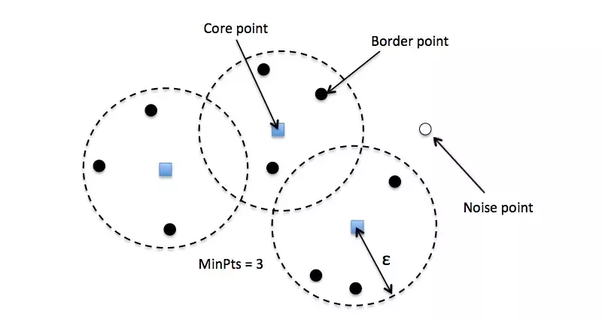

Using epsilon and minPts, we can classify each data point as:

>Core point –> a point that has at least a minimum number of other points (minPts) within its radius.

>Border point –> a point is within the radius of a core point but has less than the minimum number of other points (minPts) within its own radius.

>Noise point –> a point that is neither a core point or a border point

In [ ]:
from sklearn.cluster import DBSCAN
def DB_outliers(df):
    outlier_detection = DBSCAN(eps = 2, metric='euclidean', min_samples = 5)
    clusters = outlier_detection.fit_predict(df.values.reshape(-1,1))
    data = pd.DataFrame()
    data['cluster'] = clusters
    print(data['cluster'].value_counts().sort_values(ascending=False))


In [ ]:
DB_outliers(result['Fare']) 

 0     705
 2      50
 4      36
-1      32
 6      15
 1      12
 7       8
 5       7
 8       7
 9       7
 3       6
 10      6
Name: cluster, dtype: int64


###**ISOLATION FOREST**

It is an clustering algorithm that belongs to the ensemble decision trees family and is similar in principle to Random Forest.

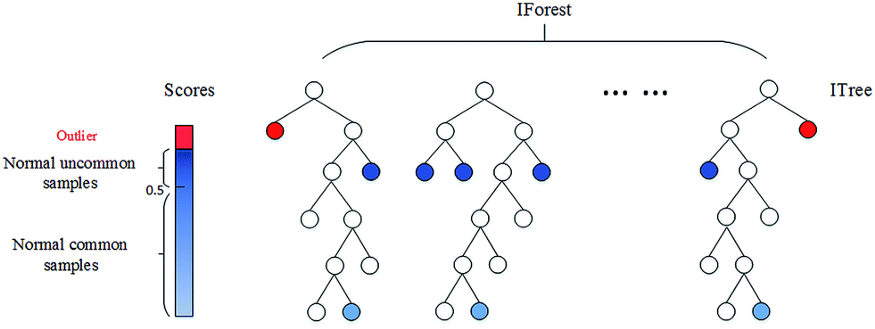

1. It classify the data point to outlier and not outliers and works great with very high dimensional data.
2. It works based on decision tree and it isolate the outliers.
3. If the result is -1, it means that this specific data point is an outlier. If the result is 1, then it means that the data point is not an outlier.

In [ ]:
from sklearn.ensemble import IsolationForest
def Iso_outliers(df):
  iso = IsolationForest(random_state = 1, contamination= 'auto')
  preds = iso.fit_predict(df.values.reshape(-1,1))
  data = pd.DataFrame()
  data['cluster'] = preds
  print(data['cluster'].value_counts().sort_values(ascending=False))


In [ ]:
Iso_outliers(result['Fare']) 

 1    706
-1    185
Name: cluster, dtype: int64


##**Treating the outliers**

> 1. Trimming/removing the outlier
> 2. Quantile based flooring and capping
> 3. Mean/Median imputation

####**Flooring and Capping.**

in this quantile-based technique, we will do the flooring(e.g 25th percentile) for the lower values and capping(e.g for the 75th percentile) for the higher values. These percentile values will be used for the quantile-based flooring and capping.
the code below drops the outliers by removing all the values that are below the 25th percentile and above the 75th percentile of the ‘Fare’ variable.

In [ ]:
result2 = result.copy()

In [ ]:
result2.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

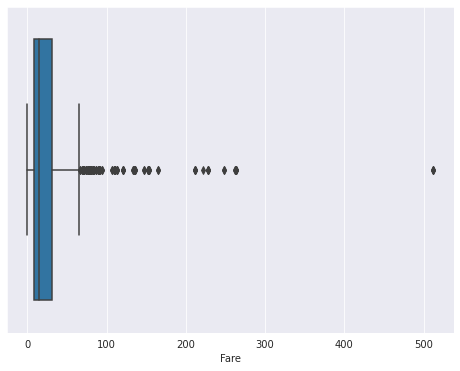

In [ ]:
sns.boxplot(result2['Fare'],data=result2)

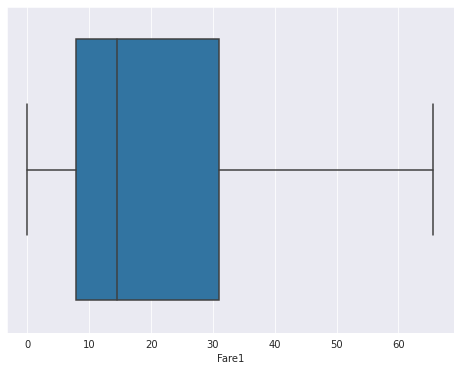

In [ ]:
Q1 = result2['Fare'].quantile(0.25)
Q3 = result2['Fare'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
result2['Fare1']=np.where(result2['Fare']>upper_whisker,upper_whisker,np.where(result2['Fare']<lower_whisker,lower_whisker,result2['Fare']))

sns.boxplot(result2['Fare1'],data=result2)

In [ ]:
result2.sample(5)

,Survived,Pclass,Age,Sex,Embarked,Fare,Fare1
282,0.0,3.0,16.0,male,S,9.5000,9.5000
661,0.0,3.0,40.0,male,C,7.2250,7.2250
550,1.0,1.0,17.0,male,C,110.8833,65.6344
275,1.0,1.0,63.0,female,S,77.9583,65.6344
270,0.0,1.0,28.0,male,S,31.0000,31.0000


####**Trimming/Remove the outliers**
In this technique, we remove the outliers from the dataset. Although it is not a good practice to follow.

Python code to delete the outlier and copy the rest of the elements to another array.

In [ ]:
result2 = result.copy()

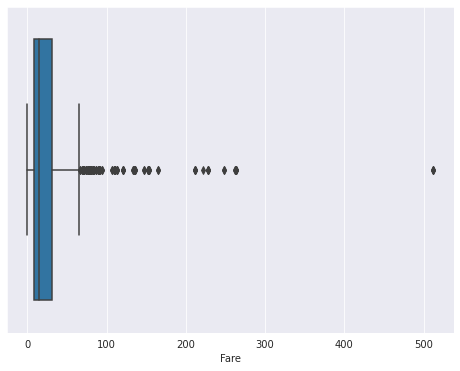

In [ ]:
sns.boxplot(result2['Fare'],data=result2)

In [ ]:
result2.shape

(891, 6)

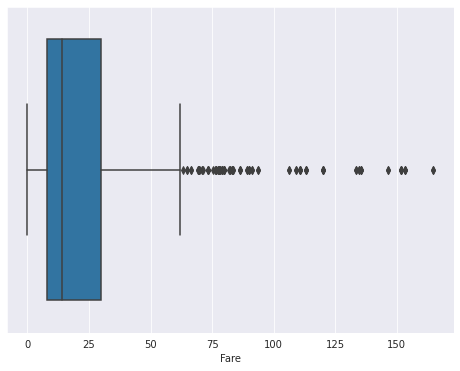

In [ ]:
Q1 = result2['Fare'].quantile(0.10)
Q3 = result2['Fare'].quantile(0.90)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 - (whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
index=result2['Fare'][(result2['Fare']>upper_whisker)|(result2['Fare']<lower_whisker)].index
result2_out = result2.drop(index=index)

sns.boxplot(result2_out['Fare'],data=result2_out)

In [ ]:
def drop_outlier(df, feature):
  q3=desc.loc[feature,'75%']
  q1=desc.loc[feature,'25%']
  iqr=1.5 * (q3 - q1)  
  df.drop(df[df[feature]>(iqr+q3)].index, inplace=True)
  df.drop(df[df[feature]<(q1-iqr)].index, inplace=True)

In [ ]:
def remove_outerlier(df, feature):  
  q1=df[feature].quantile(0.25)
  q3=df[feature].quantile(0.75)
  iqr = q3 - q1
  upper=q1-1.5*iqr
  lower=q3+1.5*iqr
  clean_data=df[~((df[feature]<(upper))  |  (df[feature]>(lower)))]
  return clean_data

####**Replacing Outliers With The Mean, Median, Mode, or other Values**

in this technique, we replace the extreme values with the mode value, you can use median or mean value but it is advised not to use the mean values because it is highly susceptible to outliers.

In [ ]:
result2 = result.copy()

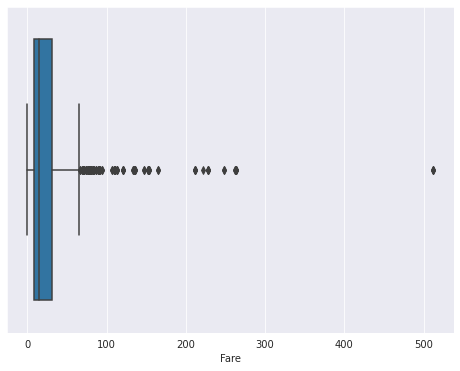

In [ ]:
sns.boxplot(result2['Fare'], data=result2 ) 
plt.show()

  

In [ ]:
def imputing_outlier(data, feature, strategy='none'):
  q1 = data[feature].quantile(0.25)
  q3 = data[feature].quantile(0.75)

  iqr = q3-q1
  
  Lower_tail = q1 - 1.5 * iqr
  Upper_tail = q3 + 1.5 * iqr

  if strategy=='none' or strategy=='mean':
    m = data[feature].mean()
  else:
    m = data[feature].median()

  print(f'Strategy is {strategy} & value is {m}')    

  #m = np.mean(data[feature])
  field=f'{feature}_out_imp'
  data[field] = data[feature];
  for i in data[field]:
      if i > Upper_tail or i < Lower_tail:
        data[field] = data[field].replace(i, m)

  return data       

In [ ]:
result2 = imputing_outlier(result2,'Fare', 'mean')
result2.head()

Strategy is mean & value is 32.2042079685746


,Survived,Pclass,Age,Sex,Embarked,Fare,Fare_out_imp
0,0.0,3.0,22.0,male,S,7.2500,7.250000
1,1.0,1.0,38.0,female,C,71.2833,32.204208
2,1.0,3.0,26.0,female,S,7.9250,7.925000
3,1.0,1.0,35.0,female,S,53.1000,53.100000
4,0.0,3.0,35.0,male,S,8.0500,8.050000


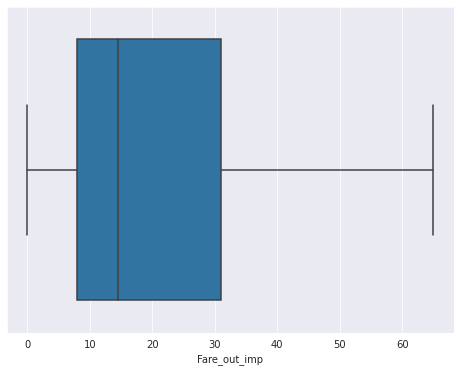

In [ ]:
sns.boxplot(result2['Fare_out_imp'])
plt.show() 

#**6. Feature Transformation**

References:
https://www.analyticsvidhya.com/blog/2021/05/feature-transformations-in-data-science-a-detailed-walkthrough/

https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/


One part of preprocessing is Feature Transformation.

Feature Transformation is a technique we should always use regardless of the model we are using, whether it is a classification task or regression task, or be it an unsupervised learning model.

###What is Feature Transformation?
1. It is a technique by which we can boost our model performance. Feature transformation is a mathematical transformation in which we apply a mathematical formula to a particular column(feature) and transform the values which are useful for our further analysis.

2. It is also known as Feature Engineering, which is creating new features from existing features that may help in improving the model performance.

3. It refers to the family of algorithms that create new features using the existing features. These new features may not have the same interpretation as the original features, but they may have more explanatory power in a different space rather than in the original space.

4. This can also be used for Feature Reduction. It can be done in many ways, by linear combinations of original features or by using non-linear functions.

5. It helps machine learning algorithms to converge faster.

###Why These Transformations?
1. Some Machine Learning models, like Linear and Logistic regression, assume that the variables follow a normal distribution. More likely, variables in real datasets will follow a skewed distribution.

2. By applying some transformations to these skewed variables, we can map this skewed distribution to a normal distribution so, this can increase the performance of our models.

###Goal of Feature Transformations
As we know that Normal Distribution is a very important distribution in Statistics, which is key to many statisticians for solving problems in statistics. Usually, the data distribution in Nature follows a Normal distribution (examples like – age, income, height, weight, etc., ). But the features in the real-life data are not normally distributed, however it is the best approximation when we are not aware of the underlying distribution pattern.

1. Function Transformation

  >LOG TRANSFORMATION:

  >RECIPROCAL TRANSFORMATION:

  >Exponential Transformation: 

  >SQUARE TRANSFORMATION:

  >SQUARE ROOT TRANSFORMATION:


2. Power Transformation
  >Box-Cox transform

  >The Yeo-Johnson transform

3. Quantile transformation

4. Custom Transformer

#**7. Feature Selection**

https://github.com/anujdutt9/Feature-Selection-for-Machine-Learning/tree/master/Filter%20Methods

https://github.com/solegalli/feature-selection-for-machine-learning

https://www.kdnuggets.com/2021/12/alternative-feature-selection-methods-machine-learning.html


https://medium.com/analytics-vidhya/feature-selection-extended-overview-b58f1d524c1c


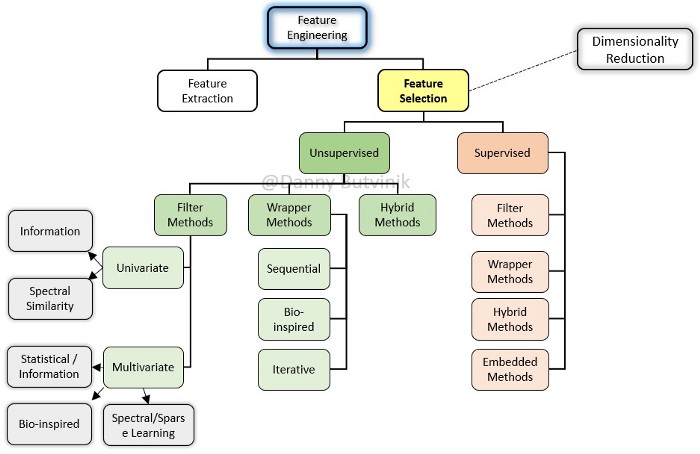


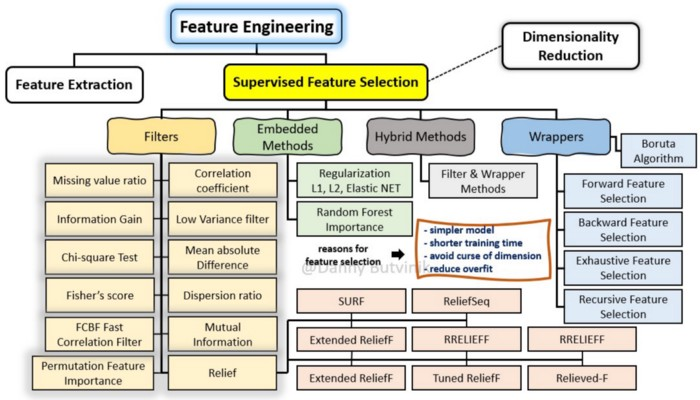

In [11]:
# Feature Importance with Extra Trees Classifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# load data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pd.read_csv(url, names=names)
print(dataframe.head(5))
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

   preg  plas  pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1


### Wrapper Method

Wrappers require some method to search the space of all possible subsets of features, assessing their quality by learning and evaluating a classifier with that feature subset. The feature selection process is based on a specific machine learning algorithm that we are trying to fit on a given dataset. It follows a greedy search approach by evaluating all the possible combinations of features against the evaluation criterion. The wrapper methods usually result in better predictive accuracy than filter methods.

https://www.analyticsvidhya.com/blog/2020/10/a-comprehensive-guide-to-feature-selection-using-wrapper-methods-in-python/#:~:text=In%20wrapper%20methods%2C%20the%20feature,features%20against%20the%20evaluation%20criterion.


#### Selecting columns based on p-value - Wrapper Method (backwardElimination)

Next we will be selecting the columns based on how they affect the p-value. We are the removing the column diagnosis because it is the column we are trying to predict

This is what we are doing in the below code block:

We assume to null hypothesis to be “The selected combination of dependent variables do not have any effect on the independent variable”.
Then we build a small regression model and calculate the p values.
If the p values is higher than the threshold, we discard that combination of features.

In [ ]:
#selected_columns = selected_columns[1:].values
#import statsmodels.formula.api as sm
import statsmodels.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns

In [ ]:
SL = 0.05
data_modeled, selected_columns = backwardElimination(X, Y, SL, selected_columns)

In [ ]:
data_modeled

array([[  6.   , 148.   ,  72.   ,  33.6  ,   0.627],
       [  1.   ,  85.   ,  66.   ,  26.6  ,   0.351],
       [  8.   , 183.   ,  64.   ,  23.3  ,   0.672],
       ...,
       [  5.   , 121.   ,  72.   ,  26.2  ,   0.245],
       [  1.   , 126.   ,  60.   ,  30.1  ,   0.349],
       [  1.   ,  93.   ,  70.   ,  30.4  ,   0.315]])

In [ ]:
selected_columns

array(['plas', 'pres', 'skin', 'pedi', 'age'], dtype=object)

#### Forward Feature Selection
This is an iterative method wherein we start with the best performing variable against the target. Next, we select another variable that gives the best performance in combination with the first selected variable. This process continues until the preset criterion is achieved.

In [12]:
#pip install mlxtend -q

In [15]:
X=dataframe.iloc[:, :-1]
y=dataframe.iloc[:,-1]

In [17]:
 import statsmodels.api as sm
 def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [18]:
forward_selection(X,y)

['plas', 'mass', 'preg', 'pedi', 'pres']

####  Bi-directional elimination(Step-wise Selection)

It is similar to forward selection but the difference is while adding a new feature it also checks the significance of already added features and if it finds any of the already selected features insignificant then it simply removes that particular feature through backward elimination.

Hence, It is a combination of forward selection and backward elimination.

In [19]:
def stepwise_selection(data, target,SL_in=0.05,SL_out = 0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break 
        else:
            break
    return best_features

In [20]:
stepwise_selection(X,y)

['plas', 'mass', 'preg', 'pedi', 'pres']

In [22]:
# from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
# from sklearn.metrics import roc_auc_score

# from mlxtend.feature_selection import SequentialFeatureSelector

# feature_selector = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1),
#            k_features=15,
#            forward=True,
#            verbose=2,
#            scoring='roc_auc',
#            cv=4)

#### Recursive Feature Elimination

‘Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute.

Then, the least important features are pruned from the current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.’

In [26]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression 

In [27]:
lr = LogisticRegression()

In [44]:
print("Feature data dimension: ", X.shape)

estimator = LogisticRegression()
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X, y)
 
filter = selector.support_
ranking = selector.ranking_

print("Mask data: ", filter)
print("Ranking: ", ranking)

features = X.columns.values
print("All features:")
print(features)

print("Selected features:")
print(features[filter])   

Feature data dimension:  (768, 8)
Mask data:  [ True  True False False False  True  True  True]
Ranking:  [1 1 2 3 4 1 1 1]
All features:
['preg' 'plas' 'pres' 'skin' 'test' 'mass' 'pedi' 'age']
Selected features:
['preg' 'plas' 'mass' 'pedi' 'age']


### Filter

These methods are generally used while doing the pre-processing step. These methods select features from the dataset irrespective of the use of any machine learning algorithm. In terms of computation, they are very fast and inexpensive and are very good for removing duplicated, correlated, redundant features but these methods do not remove multicollinearity. Selection of feature is evaluated individually which can sometimes help when features are in isolation (don’t have a dependency on other features) but will lag when a combination of features can lead to increase in the overall performance of the model.

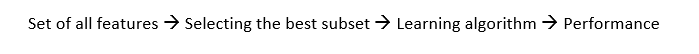

Some techniques used are:  

> Information Gain – It is defined as the amount of information provided by the feature for identifying the target value and measures reduction in the entropy values. Information gain of each attribute is calculated considering the target values for feature selection.

> Chi-square test — Chi-square method (X2) is generally used to test the relationship between categorical variables. It compares the observed values from different attributes of the dataset to its expected value.

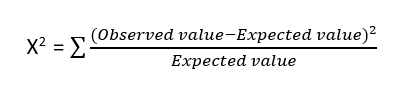

> Fisher’s Score – Fisher’s Score selects each feature independently according to their scores under Fisher criterion leading to a suboptimal set of features. The larger the Fisher’s score is, the better is the selected feature.

> Correlation Coefficient – Pearson’s Correlation Coefficient is a measure of quantifying the association between the two continuous variables and the direction of the relationship with its values ranging from -1 to 1.

> Variance Threshold – It is an approach where all features are removed whose variance doesn’t meet the specific threshold. By default, this method removes features having zero variance. The assumption made using this method is higher variance features are likely to contain more information.

> Mean Absolute Difference (MAD) – This method is similar to variance threshold method but the difference is there is no square in MAD. This method calculates the mean absolute difference from the mean value.

> Dispersion Ratio – Dispersion ratio is defined as the ratio of the Arithmetic mean (AM) to that of Geometric mean (GM) for a given feature. Its value ranges from +1 to ∞ as AM ≥ GM for a given feature. Higher dispersion ratio implies a more relevant feature.

> Mutual Dependence – This method measures if two variables are mutually dependent, and thus provides the amount of information obtained for one variable on observing the other variable. Depending on the presence/absence of a feature, it measures the amount of information that feature contributes to making the target prediction.

> Relief – This method measures the quality of attributes by randomly sampling an instance from the dataset and updating each feature and distinguishing between instances that are near to each other based on the difference between the selected instance and two nearest instances of same and opposite classes.

#### Information Gain

Information gain calculates the reduction in entropy from the transformation of a dataset. It can be used for feature selection by evaluating the Information gain of each variable in the context of the target variable.

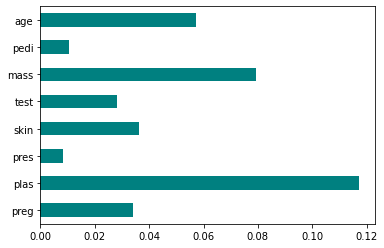

In [ ]:
from sklearn.feature_selection import mutual_info_classif

mic = mutual_info_classif(X,y)
dfseries = pd.Series(mic, X.columns)
dfseries.plot(kind='barh', color='teal')
plt.show()

#### Chi-square Test

The Chi-square test is used for categorical features in a dataset. We calculate Chi-square between each feature and the target and select the desired number of features with the best Chi-square scores. In order to correctly apply the chi-squared in order to test the relation between various features in the dataset and the target variable, the following conditions have to be met: the variables have to be categorical, sampled independently and values should have an expected frequency greater than 5.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 

X=dataframe.iloc[:, :-1]
y=dataframe.iloc[:,-1]

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=4)
fit = bestfeatures.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

print(featureScores.nlargest(10,'Score')) 

  Specs        Score
4  test  2175.565273
1  plas  1411.887041
7   age   181.303689
5  mass   127.669343
0  preg   111.519691
3  skin    53.108040
2  pres    17.605373
6  pedi     5.392682


#### Fisher’s Score

Fisher score is one of the most widely used supervised feature selection methods. The algorithm which we will use returns the ranks of the variables based on the fisher’s score in descending order. We can then select the variables as per the case.

In [32]:
pip install skfeature-chappers -q

     |████████████████████████████████| 66 kB 2.1 MB/s 


In [35]:
# from skfeature.function.similarity_based import fisher_score

# X=dataframe.iloc[:, :-1]
# y=dataframe.iloc[:,-1]


# idx = fisher_score.fisher_score(X, y, mode='rank') #returns rank directly instead of fisher score. so no need for feature_ranking
# print(idx)

In [36]:
X=dataframe.iloc[:, :-1]
y=dataframe.iloc[:,-1]

In [38]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 
# Calcualte the Fisher Score (chi2) between each feature and target
fisher_score = chi2(X.fillna(0), y)
fisher_score

(array([ 111.51969064, 1411.88704064,   17.60537322,   53.10803984,
        2175.56527292,  127.66934333,    5.39268155,  181.30368904]),
 array([4.55261043e-026, 5.48728628e-309, 2.71819252e-005, 3.15697650e-013,
        0.00000000e+000, 1.32590849e-029, 2.02213728e-002, 2.51638830e-041]))

In [39]:
p_values = pd.Series(fisher_score[1])
p_values.index = X.columns
p_values.sort_values(ascending=False)

pedi     2.022137e-02
pres     2.718193e-05
skin     3.156977e-13
preg     4.552610e-26
mass     1.325908e-29
age      2.516388e-41
plas    5.487286e-309
test     0.000000e+00
dtype: float64

#### Selecting features based on correlation  - Pearson Correlation

Generating the correlation matrix

In [ ]:
corr = dataframe.corr()

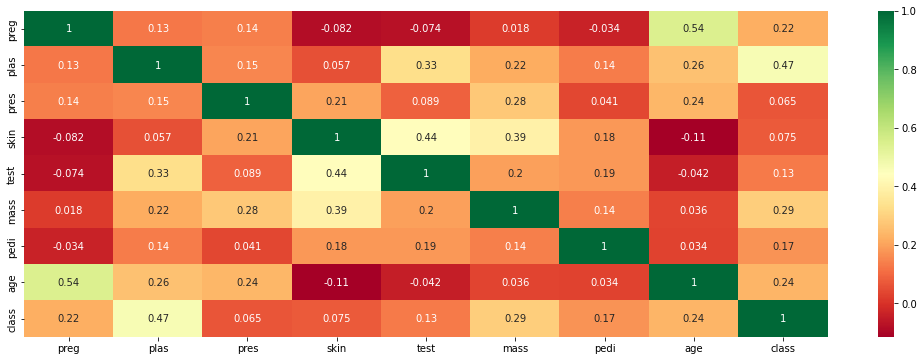

In [ ]:
plt.figure(figsize=(18,6))
sns.heatmap(corr, annot=True,cmap="RdYlGn")

In [ ]:
corr.shape

(9, 9)

In [ ]:
dataframe.columns.values

array(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age',
       'class'], dtype=object)

we compare the correlation between features and remove one of two features that have a correlation higher than 0.9

In [ ]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.5:
            if columns[j]:
                columns[j] = False

selected_columns = dataframe.columns[columns]
print(selected_columns)
data = dataframe[selected_columns]

Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'class'], dtype='object')


In [ ]:
th=0.2
a=abs(corr['class'])
result=a[a>th]
result.T 

preg     0.221898
plas     0.466581
mass     0.292695
age      0.238356
class    1.000000
Name: class, dtype: float64

####  Variance Inflation Factor(VIF) - Detecting Multicollinearity 

Collinearity is the state where two variables are highly correlated and contain similar information about the variance within a given dataset. To detect collinearity among variables, simply create a correlation matrix and find variables with large absolute values.

##### variance_inflation_factor

In VIF method, we pick each feature and regress it against all of the other features. For each regression, the factor is calculated as :

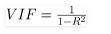

Where, R-squared is the coefficient of determination in linear regression. Its value lies between 0 and 1.

As we see from the formula, greater the value of R-squared, greater is the VIF. Hence, greater VIF denotes greater correlation. This is in agreement with the fact that a higher R-squared value denotes a stronger collinearity. Generally, a VIF above 5 indicates a high multicollinearity. 

The value for VIF starts at 1 and has no upper limit. A general rule of thumb for interpreting VIFs is as follows:

> A value of 1 indicates there is no correlation between a given explanatory variable and any other explanatory variables in the model.

> A value between 1 and 5 indicates moderate correlation between a given explanatory variable and other explanatory variables in the model, but this is often not severe enough to require attention.

> A value greater than 5 indicates potentially severe correlation between a given explanatory variable and other explanatory variables in the model. In this case, the coefficient estimates and p-values in the regression output are likely unreliable.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
X=dataframe.iloc[:, :-1]
Y=dataframe.iloc[:,-1]

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

In [ ]:
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

Inspect the factors for each predictor variable, if the VIF is between 5–10, multicollinearity is likely present and you should consider dropping the variable.

In [ ]:
vif_data.sort_values(by=['VIF'], ascending=False)

,feature,VIF
5,mass,18.408884
1,plas,16.725078
2,pres,14.619512
7,age,13.492985
3,skin,4.008696
0,preg,3.275748
6,pedi,3.195626
4,test,2.063689


 Dropping mass, plas,pres, age

Dropping variables should be an iterative process starting with the variable having the largest VIF value because its trend is highly captured by other variables. If you do this, you will notice that VIF values for other variables would have reduced too, although to a varying extent.

In [ ]:
name=['skin','preg','pedi','test']

In [ ]:
X=X[name]


In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

In [ ]:
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

In [ ]:
vif_data.sort_values(by=['VIF'], ascending=False)

,feature,VIF
0,skin,2.742648
2,pedi,2.361138
3,test,1.857175
1,preg,1.666176


**from sklearn.feature_selection import VarianceThreshold**

In [40]:
from sklearn.feature_selection import VarianceThreshold

In [41]:
X=dataframe.iloc[:, :-1]
Y=dataframe.iloc[:,-1]

In [42]:
sel = VarianceThreshold(threshold=0)

sel.fit(X_train)  # fit finds the features with zero variance

VarianceThreshold(threshold=0)

In [44]:
sum(sel.get_support())

8

In [45]:
# now let's print the number of constant feautures
# (see how we use ~ to exclude non-constant features)

constant = X.columns[~sel.get_support()]

len(constant)

0

#### Mean Absolute Difference (MAD)

The mean absolute difference (MAD) computes the absolute difference from the mean value. The main difference between the variance and MAD measures is the absence of the square in the latter. The MAD, like the variance, is also a scale variant.’ [1] This means that higher the MAD, higher the discriminatory power.

In [30]:
X=dataframe.iloc[:, :-1]
Y=dataframe.iloc[:,-1]

<BarContainer object of 8 artists>

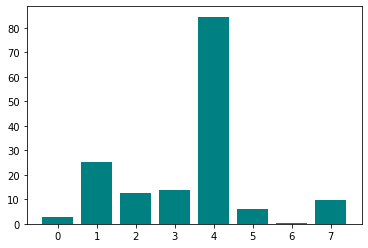

In [31]:
mad=np.sum(np.abs(X - np.mean(X,axis=0)), axis=0)/X.shape[0]

plt.bar(np.arange(X.shape[1]), mad, color='teal')

#### Dispersion ratio
‘Another measure of dispersion applies the arithmetic mean (AM) and the geometric mean (GM). For a given (positive) feature Xi on n patterns, the AM and GM are given by

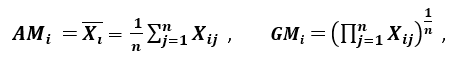AM and GM

respectively; since AMi ≥ GMi, with equality holding if and only if Xi1 = Xi2 = …. = Xin, then the ratio

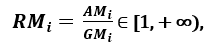RM

can be used as a dispersion measure. Higher dispersion implies a higher value of Ri, thus a more relevant feature. Conversely, when all the feature samples have (roughly) the same value, Ri is close to 1, indicating a low relevance feature.’ [1]

In [46]:
X=dataframe.iloc[:, :-1]
Y=dataframe.iloc[:,-1]

In [47]:
am=np.mean(X,axis=0)
am

preg      3.845052
plas    120.894531
pres     69.105469
skin     20.536458
test     79.799479
mass     31.992578
pedi      0.471876
age      33.240885
dtype: float64

In [48]:
gm = np.power(np.prod(X,axis=0),1)/X.shape[0]
gm

preg     0.000000e+00
plas     0.000000e+00
pres     0.000000e+00
skin     0.000000e+00
test     0.000000e+00
mass     0.000000e+00
pedi    9.881313e-324
age      0.000000e+00
dtype: float64

In [50]:
disp_ratio = am/gm
disp_ratio

preg    inf
plas    inf
pres    inf
skin    inf
test    inf
mass    inf
pedi    inf
age     inf
dtype: float64

#### Principal Component Method


Principal Component Analysis (PCA) shows which features explain the maximum amount of variance. We can specify the number of dimensions we want to keep. As previous methods, 10 features were kept:

In [ ]:
X=dataframe.iloc[:, :-1]
y=dataframe.iloc[:,-1]

In [ ]:
from sklearn.decomposition import PCA
model=PCA(n_components=5).fit(X)
n_pcs = model.components_.shape[0]
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]
X.columns[most_important]

Index(['test', 'plas', 'pres', 'skin', 'age'], dtype='object')

## Embedded Methods:
These methods encompass the benefits of both the wrapper and filter methods, by including interactions of features but also maintaining reasonable computational cost. Embedded methods are iterative in the sense that takes care of each iteration of the model training process and carefully extracts those features which contribute the most to the training for a particular iteration.

#### LASSO Regularization (L1)

Regularization consists of adding a penalty to the different parameters of the machine learning model to reduce the freedom of the model, i.e. to avoid over-fitting. In linear model regularization, the penalty is applied over the coefficients that multiply each of the predictors. From the different types of regularization, Lasso or L1 has the property that is able to shrink some of the coefficients to zero. Therefore, that feature can be removed from the model.

In [46]:
X=dataframe.iloc[:,:-1]
y=dataframe.iloc[:,-1]

In [54]:
# Lasso for Regression tasks, and Logistic Regression for Classification tasks.
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel

# using logistic regression with penalty l1.
selection = SelectFromModel(LogisticRegression(C=1, penalty='l2'))
selection.fit(X, y)

# see the selected features.
selected_features = X.columns[(selection.get_support())]

# see the deleted features.
removed_features = X.columns[(selection.estimator_.coef_ == 0).ravel().tolist()]

In [56]:
selection.get_support()

array([False, False, False, False, False, False,  True, False])

In [57]:
selection.estimator_.coef_

array([[ 1.17252348e-01,  3.35999927e-02, -1.40873371e-02,
        -1.27042795e-03, -1.24032985e-03,  7.72021743e-02,
         1.41904222e+00,  1.00352253e-02]])

## Extra Tree Classifier

This is a Model-based approach for selecting the features using the tree-based supervised models to make decisions on the importance of the features. The Extra Tree Classifier or the Extremely Random Tree Classifier is an ensemble algorithm that seeds multiple tree models constructed randomly from the training dataset and sorts out the features that have been most voted for. It fits each decision tree on the whole dataset rather than a bootstrap replica and picks out a split point at random to split the nodes.
The splitting of nodes occurring at every level of the constituent decision trees is based on the measure of randomness or entropy in the sub-nodes. The nodes are split on all variables available in the dataset and the split that results in the most homogenous sub-child is selected in the constituent tree models. This lowers the variance and makes the model less prone to overfitting.

In [ ]:
# Feature Importance with Extra Trees Classifier
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier
# load data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
print(dataframe.head(5))
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, Y)
print(model.feature_importances_)

   preg  plas  pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1
[0.12084727 0.23098273 0.10504014 0.08128825 0.071068   0.14352754
 0.11787271 0.12937336]


In [ ]:
dataframe.iloc[:,0:8].columns

Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age'], dtype='object')

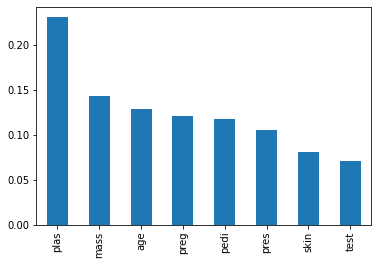

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

feat_importances = pd.Series(model.feature_importances_, index=dataframe.iloc[:,0:8].columns)
feat_importances.nlargest(13).plot.bar()
plt.show()
list1=feat_importances.keys().to_list()

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

In [ ]:
def select_features_extra_tree(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectFromModel(ExtraTreesClassifier(n_estimators=1000), max_features=5)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

In [ ]:
# feature selection
X_train_fs, X_test_fs, fs = select_features_extra_tree(X_train, y_train, X_test)
print(X_train_fs.shape)

(514, 3)


### Random Forest Feature Importance Computed in 3 Ways with Python



**Gini importance** (or mean decrease impurity), which is computed from the Random Forest structure. Let’s look how the Random Forest is constructed. It is a set of Decision Trees. Each Decision Tree is a set of internal nodes and leaves. In the internal node, the selected feature is used to make decision how to divide the data set into two separate sets with similars responses within. The features for internal nodes are selected with some criterion, which for classification tasks can be gini impurity or infomation gain, and for regression is variance reduction. We can measure how each feature decrease the impurity of the split (the feature with highest decrease is selected for internal node). For each feature we can collect how on average it decreases the impurity. The average over all trees in the forest is the measure of the feature importance. This method is available in scikit-learn implementation of the Random Forest (for both classifier and regressor). It is worth to mention, that in this method we should look at relative values of the computed importances. This biggest advantage of this method is a speed of computation - all needed values are computed during the Radom Forest training. The drawbacks of the method is to tendency to prefer (select as important) numerical features and categorical features with high cardinality. What is more, in the case of correlated features it can select one of the feature and neglect the importance of the second one (which can lead to wrong conclusions).

**Mean Decrease Accuracy** - is a method of computing the feature importance on permuted out-of-bag (OOB) samples based on mean decrease in the accuracy. This method is not implemented in the scikit-learn package. The very similar to this method is permutation based importance described below in this post.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt

In [ ]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

### Simple method 

In [ ]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
rf.feature_importances_


array([0.06214637, 0.29712258, 0.10025154, 0.05311412, 0.04251339,
       0.19149298, 0.1354327 , 0.11792631])

<BarContainer object of 8 artists>

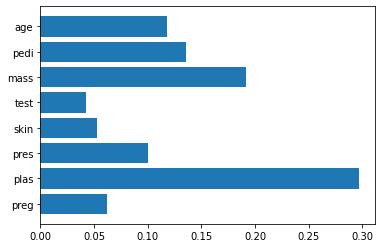

In [ ]:
plt.barh(dataframe.iloc[:,0:8].columns, rf.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

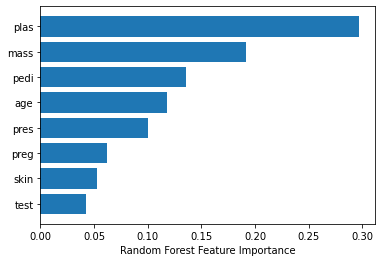

In [ ]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(dataframe.iloc[:,0:8].columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

### Permutation Based Feature Importance (with scikit-learn)

The permutation based importance can be used to overcome drawbacks of default feature importance computed with mean impurity decrease. It is implemented in scikit-learn as permutation_importance method. As arguments it requires trained model (can be any model compatible with scikit-learn API) and validation (test data). This method will randomly shuffle each feature and compute the change in the model’s performance. The features which impact the performance the most are the most important one.

The permutation based importance is computationally expensive. The permutation based method can have problem with highly-correlated features, it can report them as unimportant.

In [ ]:
perm_importance = permutation_importance(rf, X_test, y_test)

Text(0.5, 0, 'Permutation Importance')

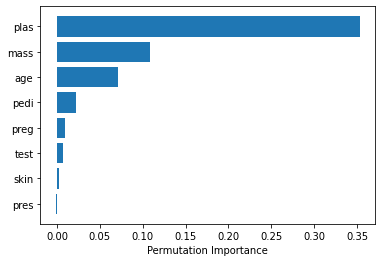

In [ ]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(dataframe.iloc[:,0:8].columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

### Workout 

In [ ]:
def select_features_random(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectFromModel(RandomForestClassifier(n_estimators=1000), max_features=5)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

In [ ]:
# feature selection
X_train_fs, X_test_fs, fs = select_features_random(X_train, y_train, X_test)
print(X_train_fs.shape)

(514, 4)


### Feature Importance Computed with SHAP Values

The SHAP interpretation can be used (it is model-agnostic) to compute the feature importances from the Random Forest. It is using the Shapley values from game theory to estimate the how does each feature contribute to the prediction. It can be easily installed (pip install shap) and used with scikit-learn Random Forest:

In [ ]:
pip install shap

     |████████████████████████████████| 564 kB 27.0 MB/s 


In [ ]:
import shap

In [ ]:
array = dataframe.values
X = dataframe.iloc[:,0:8]
Y = dataframe.iloc[:,8]

In [ ]:
Y 

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: class, Length: 768, dtype: int64

In [ ]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

In [ ]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

In [ ]:
shap_values 

array([[ 0.01708845,  0.0152886 , -0.01293287, ..., -0.27918774,
         0.03503571,  0.07363139],
       [-0.02136499,  0.14632821,  0.02951254, ..., -0.16467669,
        -0.01842956, -0.08431468],
       [ 0.0117637 , -0.12954983,  0.02923164, ..., -0.14931306,
        -0.0051726 , -0.02220498],
       ...,
       [-0.01961123,  0.2066401 , -0.02360285, ...,  0.04689051,
         0.09829034,  0.01080638],
       [ 0.00559514, -0.17235735,  0.09831963, ..., -0.15845889,
        -0.02504704, -0.00211107],
       [ 0.02954288, -0.24743326, -0.02254816, ..., -0.01577544,
        -0.05709524,  0.06036399]])

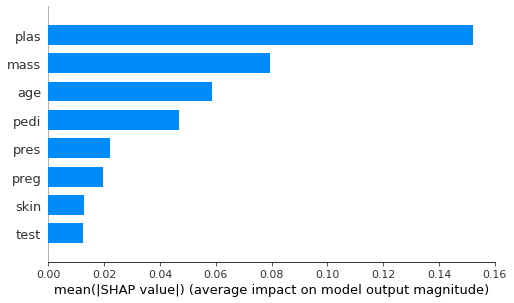

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

### Feature Importance in XGBoost

In [ ]:
import pandas as pd
import numpy as np
 
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
model=XGBClassifier()
 
model.fit(X_train,y_train)
 
feature_importances=pd.DataFrame({'features':X_train.columns,'feature_importance':model.feature_importances_})
print(feature_importances.sort_values('feature_importance',ascending=False))

  features  feature_importance
1     plas            0.279920
5     mass            0.169704
7      age            0.125351
0     preg            0.095707
6     pedi            0.092986
4     test            0.088823
2     pres            0.081529
3     skin            0.065980


In [ ]:
dataframe.head(5)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# model=smf.logit('preg+plas+pres+skin+test+mass+pedi+age~class',data=dataframe)

# result = model.fit()
 
# feature_importances=pd.DataFrame(result.conf_int()[1]).rename(columns={1:'Coefficients'}).eval("absolute_coefficients=abs(Coefficients)")
# feature_importances.sort_values('absolute_coefficients',ascending=False).drop('Intercept')[['absolute_coefficients']]


#**sample testing**

In [ ]:
result2 = result.copy()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f054cd70550>,
      dtype=object)

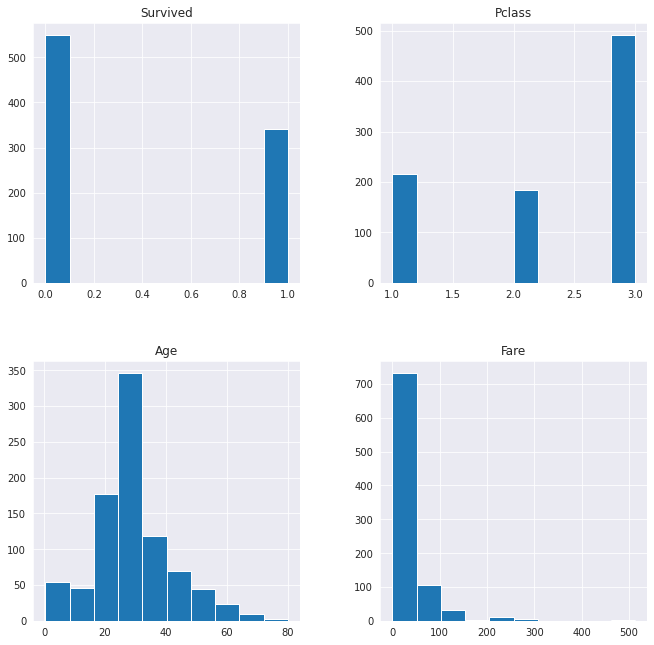

In [ ]:
import matplotlib.pyplot as plt
result2[result2.dtypes[(result2.dtypes=="float64")|(result2.dtypes=="int64")]
                        .index.values].hist(figsize=[11,11])

AttributeError: ignored

In [ ]:
result2.describe()

,Survived,Pclass,Age,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,32.204208
std,0.486592,0.836071,13.019697,49.693429
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,22.000000,7.910400
50%,0.000000,3.000000,28.000000,14.454200
75%,1.000000,3.000000,35.000000,31.000000
max,1.000000,3.000000,80.000000,512.329200


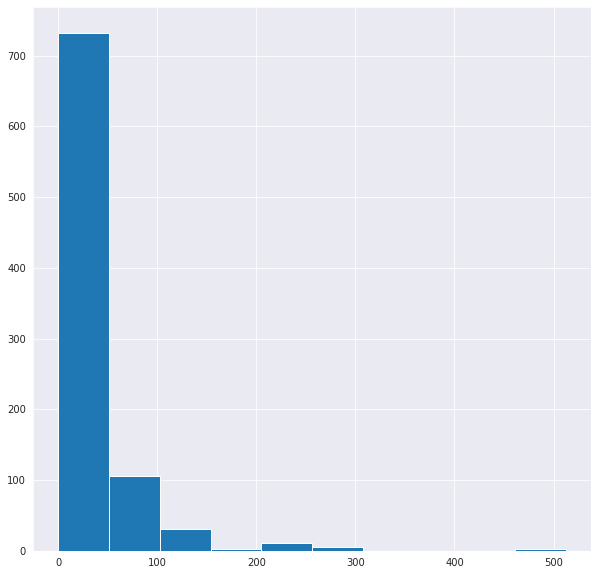

In [ ]:
result2['Fare'].hist(figsize=(10,10))

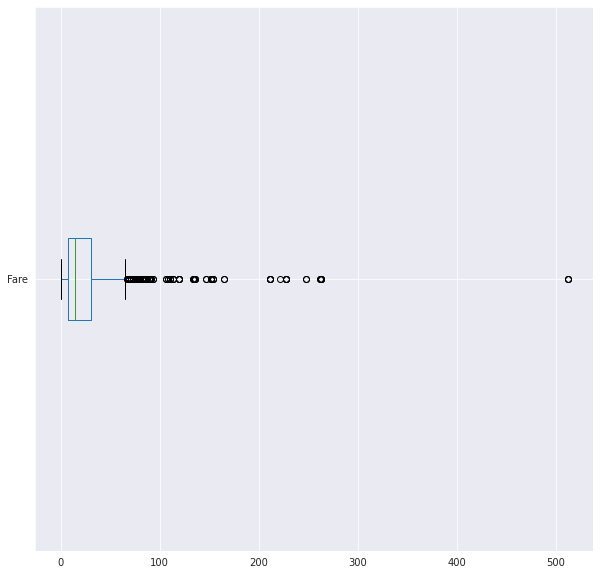

In [ ]:
result2.boxplot(['Fare'],figsize=(10,10),vert=False)

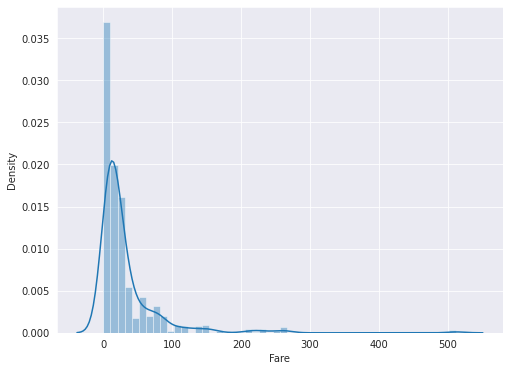

In [ ]:
#sns.displot(kind='hist', data=result2, x=result2['Fare'], y=result2['Survived'])
sns.distplot(result2['Fare'])

the line of code below prints the outliers and sets the 25th and 75th percentile of the ‘Fare’ variable respectively which will also be used in flooring and capping in the outliers treatment process.

In [ ]:
Q1 = result2['Fare'].quantile(0.25) 
Q3 = result2['Fare'].quantile(0.75) 
IQR = Q3 - Q1
whisker_width = 1.5 
Fare_outliers = result2[(result2['Fare'] < Q1 - whisker_width * IQR) | (result2['Fare'] > Q3 + whisker_width * IQR)] 
Fare_outliers.head()

,Survived,Pclass,Age,Sex,Embarked,Fare
1,1.0,1.0,38.0,female,C,71.2833
27,0.0,1.0,19.0,male,S,263.0000
31,1.0,1.0,28.0,female,C,146.5208
34,0.0,1.0,28.0,male,C,82.1708
52,1.0,1.0,49.0,female,C,76.7292


In [ ]:
result2.iloc[index].describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,116.0,0.681034,0.468098,0.00,0.0000,1.0,1.0000,1.0000
Pclass,116.0,1.163793,0.509799,1.00,1.0000,1.0,1.0000,3.0000
Age,116.0,33.456207,13.885239,0.92,24.0000,30.0,41.2500,70.0000
Fare,116.0,128.291629,84.636908,66.60,78.1896,90.0,147.7781,512.3292


the line of code below prints the outliers

In [ ]:
fare_mean = result2['Fare'].mean() 
fare_std = result2['Fare'].std() 

low = fare_mean - (3 * fare_std) 
high = fare_mean + (3 * fare_std) 

fare_outliers = result2[(result2['Fare'] < low) | (result2['Fare'] > high)] 

fare_outliers.head()

,Survived,Pclass,Age,Sex,Embarked,Fare
27,0.0,1.0,19.0,male,S,263.0000
88,1.0,1.0,23.0,female,S,263.0000
118,0.0,1.0,24.0,male,C,247.5208
258,1.0,1.0,35.0,female,C,512.3292
299,1.0,1.0,50.0,female,C,247.5208


In [ ]:
fare_outliers.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,20.0,0.700000,0.470162,0.0000,0.00000,1.0000,1.0,1.0000
Pclass,20.0,1.000000,0.000000,1.0000,1.00000,1.0000,1.0,1.0000
Age,20.0,30.850000,12.265806,15.0000,22.50000,28.0000,36.5,64.0000
Fare,20.0,279.308545,102.353391,211.3375,226.08855,247.5208,263.0,512.3292


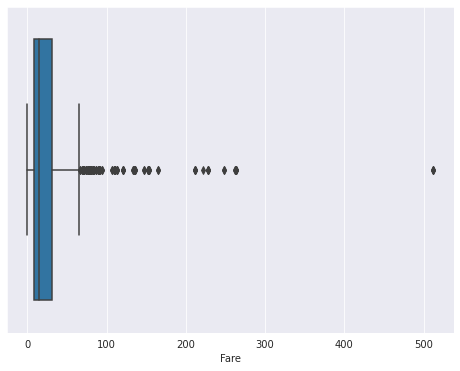

In [ ]:
sns.boxplot(result2['Fare'], data = result2)

In [ ]:
Q1 = df['Fare'].quantile(0.25) 
Q3 = df['Fare'].quantile(0.75) 

IQR = Q3 - Q1

whisker_width = 1.5 
lower_whisker = Q1 - (whisker_width * IQR) 
upper_whisker = Q3 + (whisker_width * IQR) 
print(f'lower_whisker is {lower_whisker}; upper_whisker is {upper_whisker}')
result2['Fare2'] = np.where(result2['Fare'] > upper_whisker, upper_whisker, np.where(result2['Fare'] < lower_whisker, lower_whisker, result2['Fare']))

lower_whisker is -26.724; upper_whisker is 65.6344


In [ ]:
result2.iloc[index]

,Survived,Pclass,Age,Sex,Embarked,Fare,Fare2
1,1.0,1.0,38.0,female,C,71.2833,65.6344
27,0.0,1.0,19.0,male,S,263.0000,65.6344
31,1.0,1.0,28.0,female,C,146.5208,65.6344
34,0.0,1.0,28.0,male,C,82.1708,65.6344
52,1.0,1.0,49.0,female,C,76.7292,65.6344
...,...,...,...,...,...,...,...
846,0.0,3.0,28.0,male,S,69.5500,65.6344
849,1.0,1.0,28.0,female,C,89.1042,65.6344
856,1.0,1.0,45.0,female,S,164.8667,65.6344
863,0.0,3.0,28.0,female,S,69.5500,65.6344


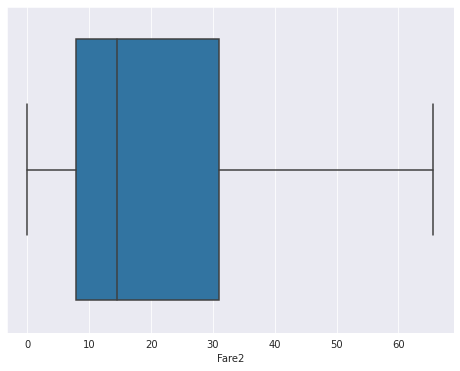

In [ ]:
sns.boxplot(result2['Fare2'], data = result2)